In [1]:
import os

# Specify the directory path you want to set as the working directory
directory_path =  '/Users/rachm/PyPSA-GB/Dissertation'

# Change the current working directory to the specified directory path
try:
    os.chdir(directory_path)
    print(f"Current working directory changed to: {os.getcwd()}")
except FileNotFoundError:
    print(f"Error: The directory at {directory_path} was not found.")

Current working directory changed to: C:\Users\rachm\PyPSA-GB\Dissertation


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature

import imageio

from scipy.spatial import Voronoi, voronoi_plot_2d
from shapely.geometry import Polygon, Point

from statistics import mean

In [3]:
df_network = pd.read_csv('../data/network/BusesBasedGBsystem/buses.csv')
lon = df_network['x'].values
lat = df_network['y'].values
coordinates = np.zeros(shape=(len(lon), 2))
for i in range(len(lon)):
    coordinates[i][0] = lon[i]
    coordinates[i][1] = lat[i]

df_lines = pd.read_csv('../data/network/BusesBasedGBsystem/lines.csv', index_col=0)
df_buses = pd.read_csv('../data/network/BusesBasedGBsystem/buses.csv', index_col=0)

In [4]:
line_coordinates = []
for i in range(len(df_lines['bus0'].values)):

    bus0 = df_lines['bus0'].iloc[i]
    bus1 = df_lines['bus1'].iloc[i]
    bus0_coord = [df_buses['x'][bus0], df_buses['y'][bus0]]
    bus1_coord = [df_buses['x'][bus1], df_buses['y'][bus1]]
    line_coordinates.append([bus0_coord, bus1_coord])

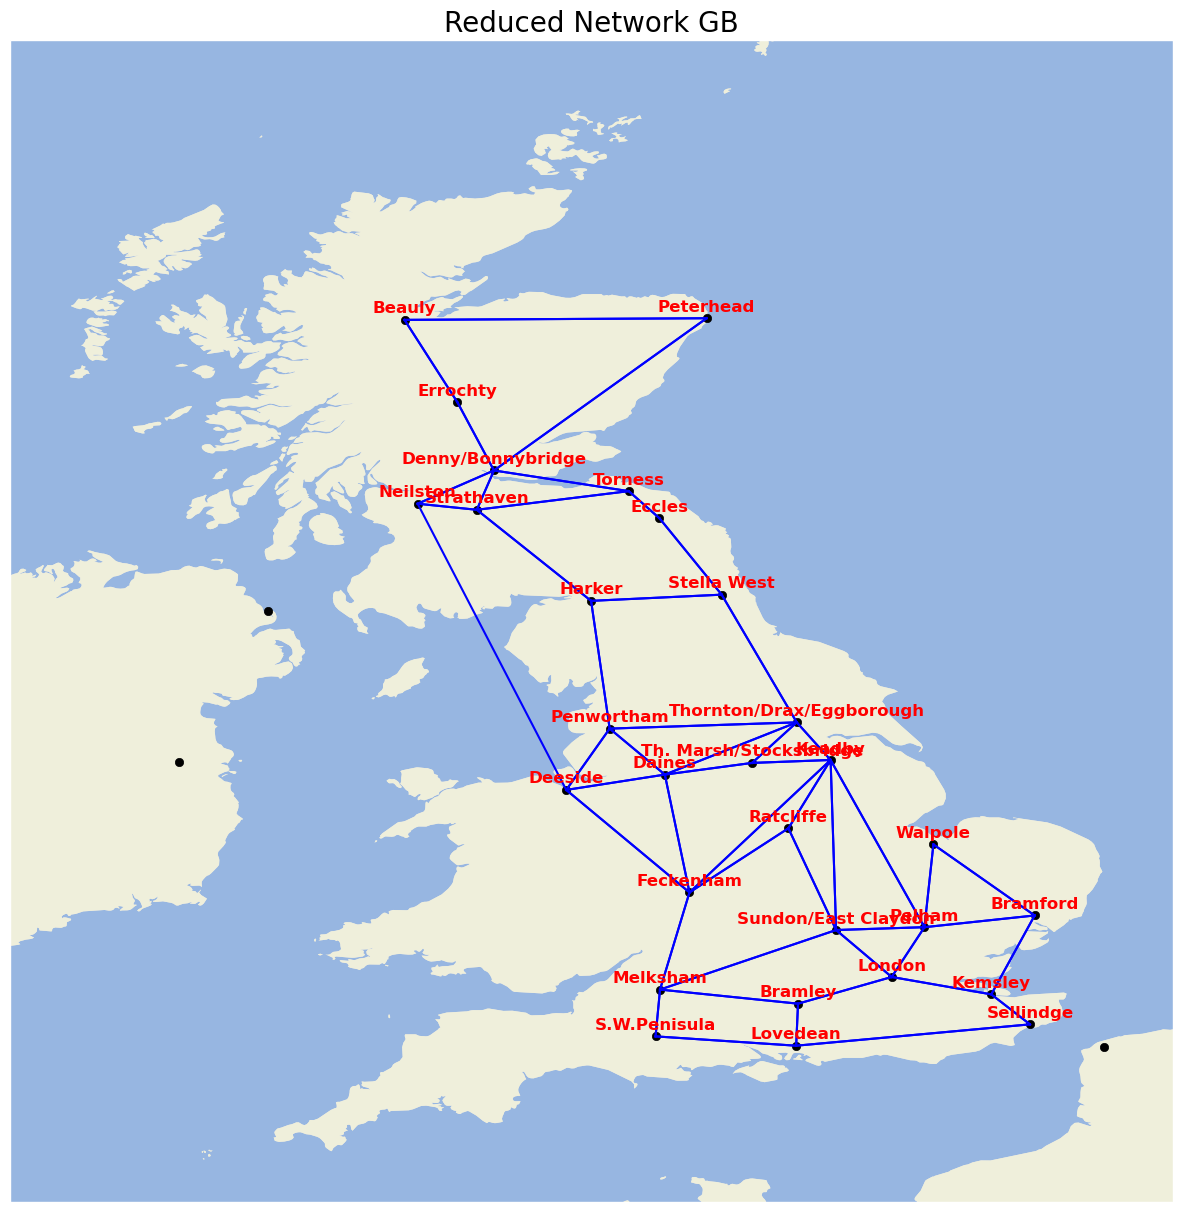

In [5]:
fig = plt.figure()
fig.set_size_inches(15, 17)
ax = fig.add_subplot(1, 1, 1,
                     projection=ccrs.PlateCarree())

extent = [-8.09782, 2.40511, 60, 49.5]
ax.set_extent(extent)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND)


for i in range(len(df_lines['bus0'].values)):
    ax.plot([line_coordinates[i][0][0], line_coordinates[i][1][0]],
            [line_coordinates[i][0][1], line_coordinates[i][1][1]],
            c='blue')

# ax.scatter(lon, lat, s=sizes * marker_scaler, c='black', edgecolors='black')
ax.scatter(lon, lat, c='black', edgecolors='black')
for i, txt in enumerate(df_buses[:29].index):
    ax.annotate(txt, (lon[i], lat[i]),
                xytext=(0, 5),
                textcoords="offset points",
                ha='center',
                fontweight='extra bold',
                color='red',
                fontsize='large')

ax.set_title('Reduced Network GB', fontsize=20)

plt.show()

In [6]:
df_buses.iloc[:29, :]

v_nom carrier         x          y
name                                                        
Beauly                      275      AC -4.533299  57.469876
Peterhead                   275      AC -1.804331  57.484481
Errochty                    275      AC -4.054907  56.724571
Denny/Bonnybridge           275      AC -3.725282  56.109237
Neilston                    400      AC -4.414788  55.808831
Strathaven                  400      AC -3.880268  55.753988
Torness                     400      AC -2.507448  55.922401
Eccles                      400      AC -2.229827  55.677255
Harker                      400      AC -2.847820  54.931176
Stella West                 400      AC -1.667840  54.987162
Penwortham                  400      AC -2.679880  53.776910
Deeside                     400      AC -3.072208  53.223030
Daines                      400      AC -2.181395  53.361456
Th. Marsh/Stocksbridge      400      AC -1.392936  53.467042
Thornton/Drax/Eggborough    400      AC -0.989753  53.833428
Keadby                      400      AC -0.683866  53.493436
Ratcliffe                   400      AC -1.065185  52.876444
Feckenham                   400      AC -1.958841  52.296944
Walpole                     400      AC  0.244973  52.730476
Bramford                    400      AC  1.159651  52.088738
Pelham                      400      AC  0.164054  51.982791
Sundon/East Claydon         400      AC -0.634044  51.957294
Melksham                    400      AC -2.224944  51.419196
Bramley                     400      AC -0.978219  51.291877
London                      400      AC -0.131943  51.532973
Kemsley                     400      AC  0.768177  51.376012
Sellindge                   400      AC  1.117562  51.104927
Lovedean                    400      AC -0.995022  50.912050
S.W.Penisula                400      AC -2.265294  50.996346

In [7]:
df_lines

bus0               bus1        r        x       b  s_nom
name                                                                  
0           Beauly          Peterhead  0.01220  0.02000  0.0856    525
1           Beauly           Errochty  0.00700  0.15000  0.0520    132
2           Beauly          Peterhead  0.01220  0.02000  0.2844    525
3           Beauly           Errochty  0.00700  0.15000  0.0520    132
4        Peterhead  Denny/Bonnybridge  0.00040  0.06500  0.4454    760
...            ...                ...      ...      ...     ...    ...
94       Sellindge            Kemsley  0.00020  0.00503  0.1797   3100
95        Lovedean          Sellindge  0.00038  0.00711  0.2998   3070
96        Lovedean          Sellindge  0.00038  0.00711  0.2998   3070
97    S.W.Penisula           Lovedean  0.00051  0.00796  0.3400   2780
98    S.W.Penisula           Lovedean  0.00051  0.00796  0.3400   2780

[99 rows x 6 columns]

In [8]:
df_interconnectors = pd.read_csv('../data/network/BusesBasedGBsystem/interconnectors/links.csv', index_col=0)
df_interconnectors

bus0       bus1 carrier  p_nom
name                                           
BritNed   Netherlands    Kemsley      DC   1100
EastWest      Ireland    Deeside      DC    600
Moyle      N. Ireland   Neilston      DC    600
Nemo          Belgium  Sellindge      DC   1100
IFA           France1  Sellindge      DC   2100
IFA2          France2   Lovedean      DC   1100

In [9]:
df_interconnectors_future = pd.read_csv('../data/network/BusesBasedGBsystem/interconnectors/links_future.csv', index_col=0)
df_interconnectors_future

bus0          bus1 carrier  p_nom installed date  \
name                                                                    
BritNed       Netherlands       Kemsley      DC   1000     01/01/2020   
EastWest          Ireland       Deeside      DC    600     01/01/2020   
Moyle          N. Ireland      Neilston      DC    600     01/01/2020   
Nemo              Belgium     Sellindge      DC   1000     01/01/2020   
IFA               France1     Sellindge      DC   2000     01/01/2020   
IFA2              France2      Lovedean      DC   1000     01/01/2020   
NSL                Norway   Stella West      DC   1400     01/01/2021   
ElecLink          France1     Sellindge      DC   1000     01/01/2022   
Viking Link       Denmark       Walpole      DC   1400     01/01/2023   
Greenlink        Ireland2      Melksham      DC    500     01/01/2023   
GridLink          France1       Kemsley      DC   1400     01/01/2024   
NeuConnect        Germany       Kemsley      DC   1400     01/01/2024   
NorthConnect       Norway     Peterhead      DC   1400     01/01/2025   
FAB Link          France2  S.W.Penisula      DC   1400     01/01/2025   

              marginal_cost  
name                         
BritNed                  20  
EastWest                  7  
Moyle                     7  
Nemo                     20  
IFA                      15  
IFA2                     15  
NSL                       1  
ElecLink                 15  
Viking Link               7  
Greenlink                 7  
GridLink                 15  
NeuConnect               20  
NorthConnect              1  
FAB Link                 15

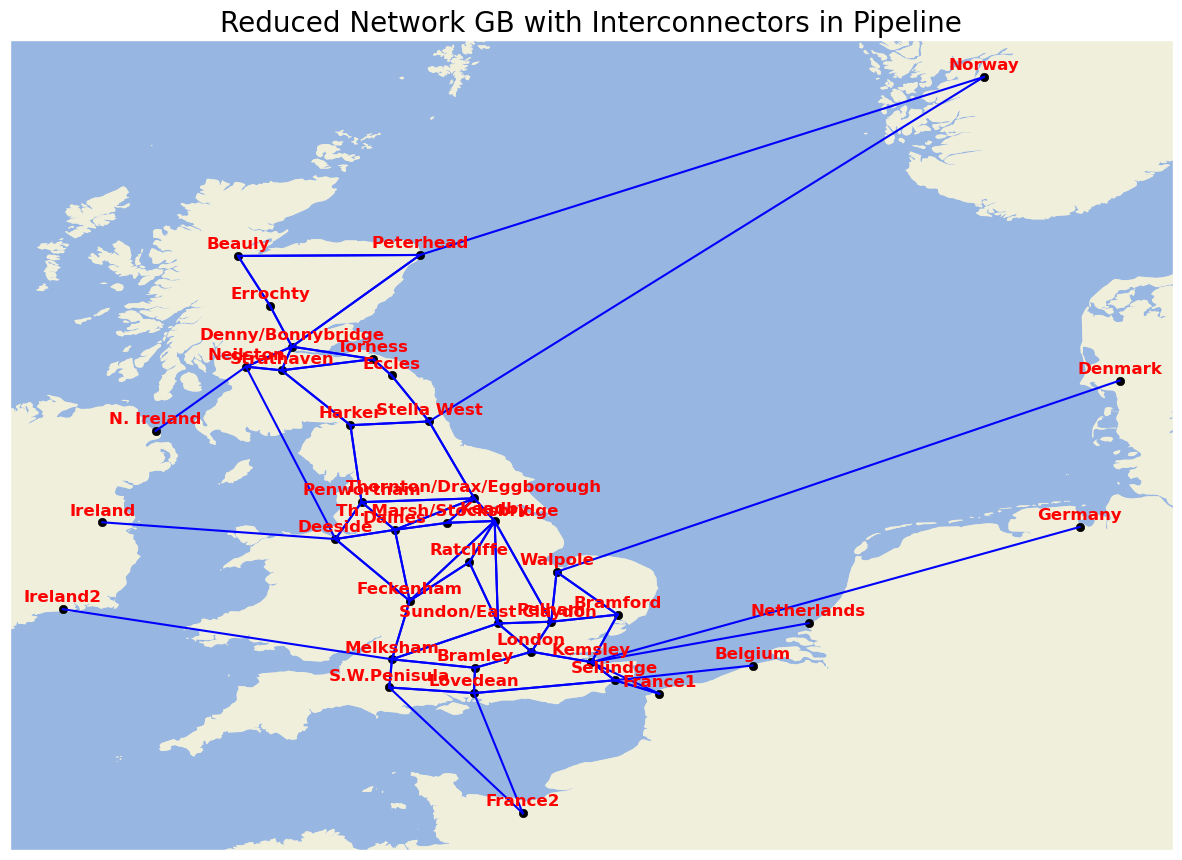

In [10]:
#define df
df_lines = pd.read_csv('../data/network/BusesBasedGBsystem/lines.csv', index_col=0)
df_buses = pd.read_csv('../data/network/BusesBasedGBsystem/buses.csv', index_col=0)
df_interconnectors = pd.read_csv('../data/network/BusesBasedGBsystem/interconnectors/links_future.csv', index_col=0) 
df_buses_future = pd.read_csv('../data/network/BusesBasedGBsystem/interconnectors/links_new_buses.csv', index_col=0)

# concat new buses
df_buses = pd.concat([df_buses,df_buses_future])

# drop duplicate index incase future are already included
df_buses = df_buses[~df_buses.index.duplicated(keep='first')]
lon = df_buses['x'].values
lat = df_buses['y'].values
 
# append the interconnector data
df_lines_interconnectors = pd.concat([df_lines, df_interconnectors]).reset_index()

line_coordinates = []
for i in range(len(df_lines_interconnectors['bus0'].values)):

    bus0 = df_lines_interconnectors['bus0'].iloc[i]
    bus1 = df_lines_interconnectors['bus1'].iloc[i]
    bus0_coord = [df_buses['x'][bus0], df_buses['y'][bus0]]
    bus1_coord = [df_buses['x'][bus1], df_buses['y'][bus1]]
    line_coordinates.append([bus0_coord, bus1_coord]) # why it is still use append function??????

fig = plt.figure()
fig.set_size_inches(15, 30)
ax = fig.add_subplot(1, 1, 1,
                     projection=ccrs.PlateCarree())

ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND)


for i in range(len(df_lines_interconnectors['bus0'].values)):
    ax.plot([line_coordinates[i][0][0], line_coordinates[i][1][0]],
            [line_coordinates[i][0][1], line_coordinates[i][1][1]],
            c='blue')

# ax.scatter(lon, lat, s=sizes * marker_scaler, c='black', edgecolors='black')
ax.scatter(lon, lat, c='black', edgecolors='black')
for i, txt in enumerate(df_buses.index):
    ax.annotate(txt, (lon[i], lat[i]),
                xytext=(0, 5),
                textcoords="offset points",
                ha='center',
                fontweight='extra bold',
                color='red',
                fontsize='large')

ax.set_title('Reduced Network GB with Interconnectors in Pipeline', fontsize=20)

plt.show()

In [11]:
import os
from dotenv import find_dotenv, load_dotenv

load_dotenv(find_dotenv())
src_path = os.environ.get('PROJECT_SRC')
os.chdir(src_path)

In [12]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import pandas as pd
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature

import imageio

from scipy.spatial import Voronoi, voronoi_plot_2d
from shapely.geometry import Polygon, Point

from statistics import mean

import loads

In [13]:
df_loads = loads.read_historical_demand_data()
df_loads.rename(columns={'POWER_ESPENI_MW': 'load'}, inplace=True)
# add columns with year, month, and weekday name
df_loads['Year'] = df_loads.index.year
df_loads['Month'] = df_loads.index.month

Text(0, 0.5, 'Load [MW]')

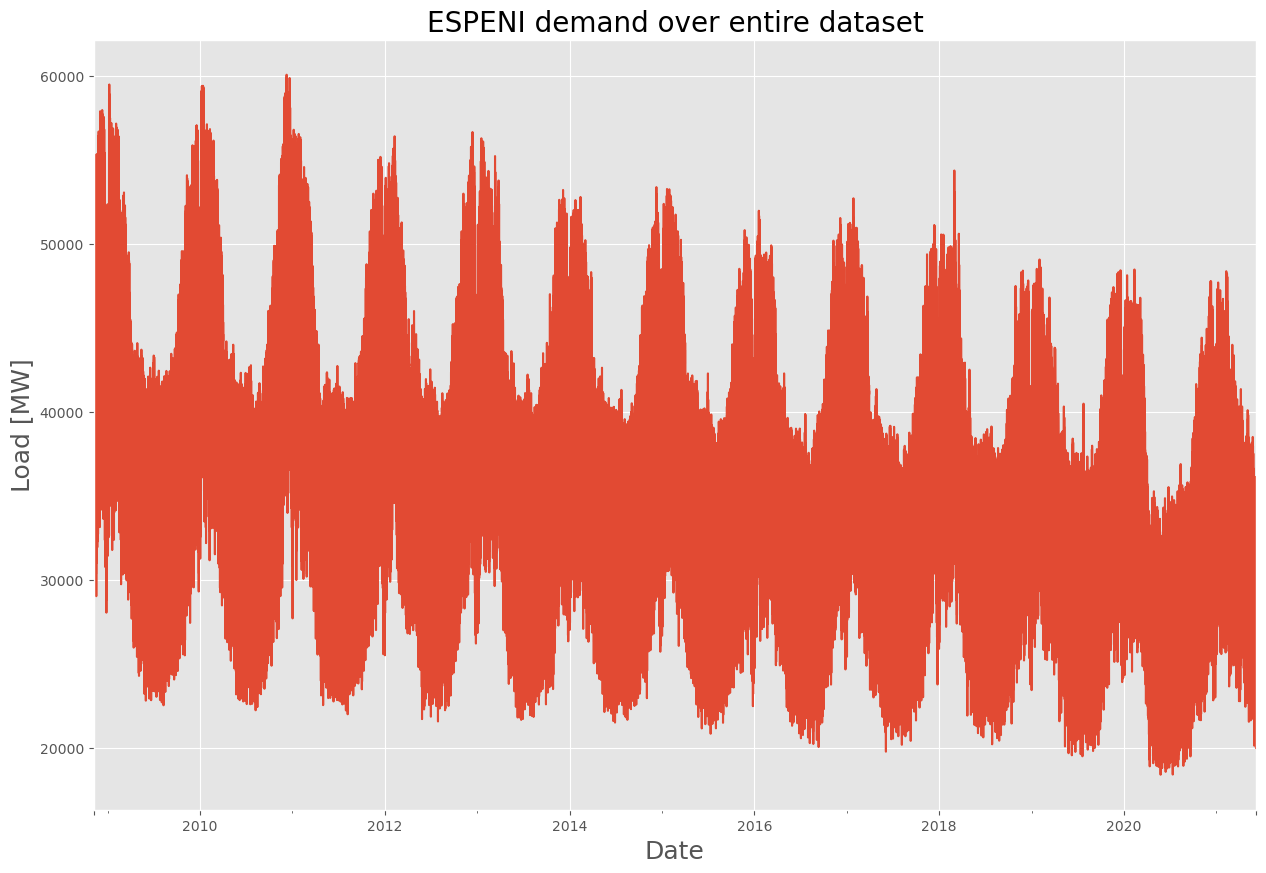

In [14]:
# Plot demand data
df_loads['load'].plot(linestyle='-', figsize=(15,10))
plt.title('ESPENI demand over entire dataset', fontsize=20)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Load [MW]', fontsize=18)

In [3]:
import os
import sys
from dotenv import find_dotenv, load_dotenv

load_dotenv(find_dotenv())
src_path = os.environ.get('PROJECT_SRC')
os.chdir(src_path)

In [4]:
#create timeseries year 2035
start = '2035-01-01 00:00:00'
end = '2035-12-31 23:30:00'
year = int(start[0:4])
time_step = 0.5  # assuming 1 hour time step as a fraction
year_baseline = 2021

In [5]:
import loads  # Assuming loads is an imported module

# Write loads for the year 2035
loads.write_loads(year)

# Write load parameters based on the given scenario and baseline year
loads.write_loads_p_set(start, end, year, time_step, 'eload', year_baseline=year_baseline, scenario='Leading the Way', FES=2021)

Beauly   Peterhead    Errochty  Denny/Bonnybridge  \
name                                                                         
2035-01-01 00:00:00  311.457777  482.942593  154.268589        1373.621403   
2035-01-01 00:30:00  287.035106  445.073100  142.171762        1265.910160   
2035-01-01 01:00:00  271.266189  420.622012  134.361237        1196.364549   
2035-01-01 01:30:00  264.151027  409.589329  130.837016        1164.984569   
2035-01-01 02:00:00  263.590585  408.720314  130.559423        1162.512851   
...                         ...         ...         ...                ...   
2035-12-31 21:30:00  340.950843  528.674178  168.876841        1503.694591   
2035-12-31 22:00:00  321.703249  498.829096  159.343289        1418.806980   
2035-12-31 22:30:00  311.119455  482.417995  154.101014        1372.129300   
2035-12-31 23:00:00  309.199460  479.440874  153.150019        1363.661551   
2035-12-31 23:30:00  309.199460  479.440874  153.150019        1363.661551   

                        Neilston  Strathaven     Torness      Eccles  \
name                                                                   
2035-01-01 00:00:00  1627.878850  495.332491  429.364200  122.647446   
2035-01-01 00:30:00  1500.230247  456.491455  395.696006  113.030161   
2035-01-01 01:00:00  1417.811737  431.413074  373.957559  106.820595   
2035-01-01 01:30:00  1380.623319  420.097348  364.148859  104.018750   
2035-01-01 02:00:00  1377.694086  419.206038  363.376254  103.798056   
...                          ...         ...         ...         ...   
2035-12-31 21:30:00  1782.028597  542.237320  470.022251  134.261377   
2035-12-31 22:00:00  1681.428282  511.626562  443.488229  126.681960   
2035-12-31 22:30:00  1626.110559  494.794434  428.897801  122.514219   
2035-12-31 23:00:00  1616.075429  491.740935  426.250966  121.758154   
2035-12-31 23:30:00  1616.075429  491.740935  426.250966  121.758154   

                         Harker  Stella West  ...     Bramford       Pelham  \
name                                          ...                             
2035-01-01 00:00:00  451.489599  2740.819511  ...  1504.760234   933.704467   
2035-01-01 00:30:00  416.086463  2525.900703  ...  1386.765862   860.488901   
2035-01-01 01:00:00  393.227821  2387.134687  ...  1310.580772   813.216015   
2035-01-01 01:30:00  382.913672  2324.521465  ...  1276.204963   791.885809   
2035-01-01 02:00:00  382.101254  2319.589587  ...  1273.497272   790.205685   
...                         ...          ...  ...          ...          ...   
2035-12-31 21:30:00  494.242785  3000.357642  ...  1647.251433  1022.120326   
2035-12-31 22:00:00  466.341448  2830.979370  ...  1554.259652   964.418880   
2035-12-31 22:30:00  450.999166  2737.842283  ...  1503.125681   932.690226   
2035-12-31 23:00:00  448.215939  2720.946381  ...  1493.849520   926.934364   
2035-12-31 23:30:00  448.215939  2720.946381  ...  1493.849520   926.934364   

                     Sundon/East Claydon     Melksham      Bramley  \
name                                                                 
2035-01-01 00:00:00          3105.894320  4126.376869  1407.852300   
2035-01-01 00:30:00          2862.348512  3802.810872  1297.456873   
2035-01-01 01:00:00          2705.098982  3593.894936  1226.178173   
2035-01-01 01:30:00          2634.145732  3499.629059  1194.016197   
2035-01-01 02:00:00          2628.556932  3492.203985  1191.482884   
...                                  ...          ...          ...   
2035-12-31 21:30:00          3400.002708  4517.118448  1541.166935   
2035-12-31 22:00:00          3208.063396  4262.114942  1454.163910   
2035-12-31 22:30:00          3102.520529  4121.894574  1406.323014   
2035-12-31 23:00:00          3083.374106  4096.457342  1397.644246   
2035-12-31 23:30:00          3083.374106  4096.457342  1397.644246   

                           London      Kemsley    Sellindge     Lovedean  \
name                                                      

In [6]:
import pandas as pd

# Read the generated loads data from the CSV file
df_loads = pd.read_csv('LOPF_data/loads-p_set.csv', index_col=0)

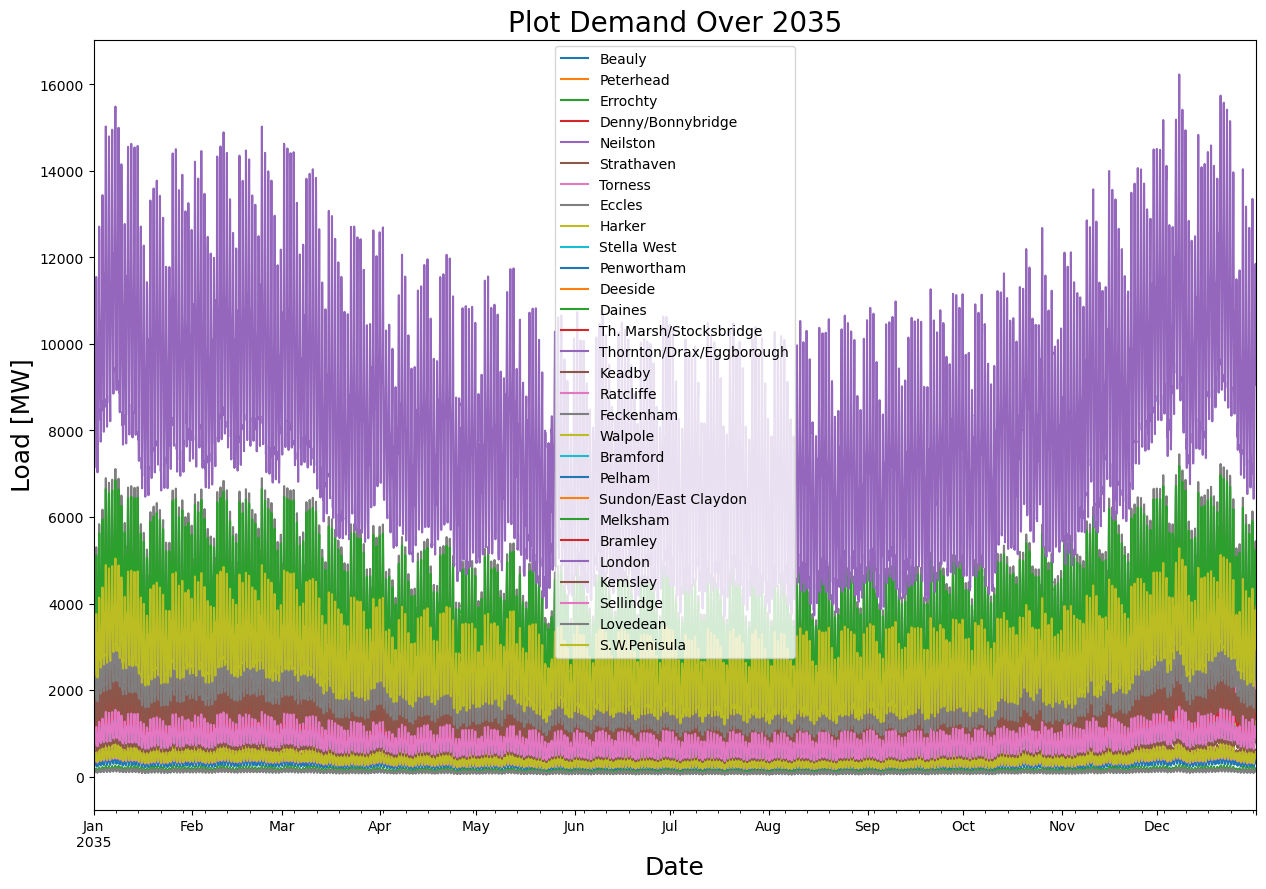

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
# Correct the file path as needed
file_path = ('LOPF_data/loads-p_set.csv')

# Read the loads data from the CSV file
df_loads = pd.read_csv('LOPF_data/loads-p_set.csv', index_col=0)

# Convert the index to datetime for accurate plotting
df_loads.index = pd.to_datetime(df_loads.index)

# Plot the load data
df_loads.plot(linestyle='-', figsize=(15, 10))

# Customize the plot
#plt.title('ESPENI Demand Over 2021', fontsize=20)
plt.title('Plot Demand Over 2035', fontsize=20)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Load [MW]', fontsize=18)

# Display the plot
plt.show()

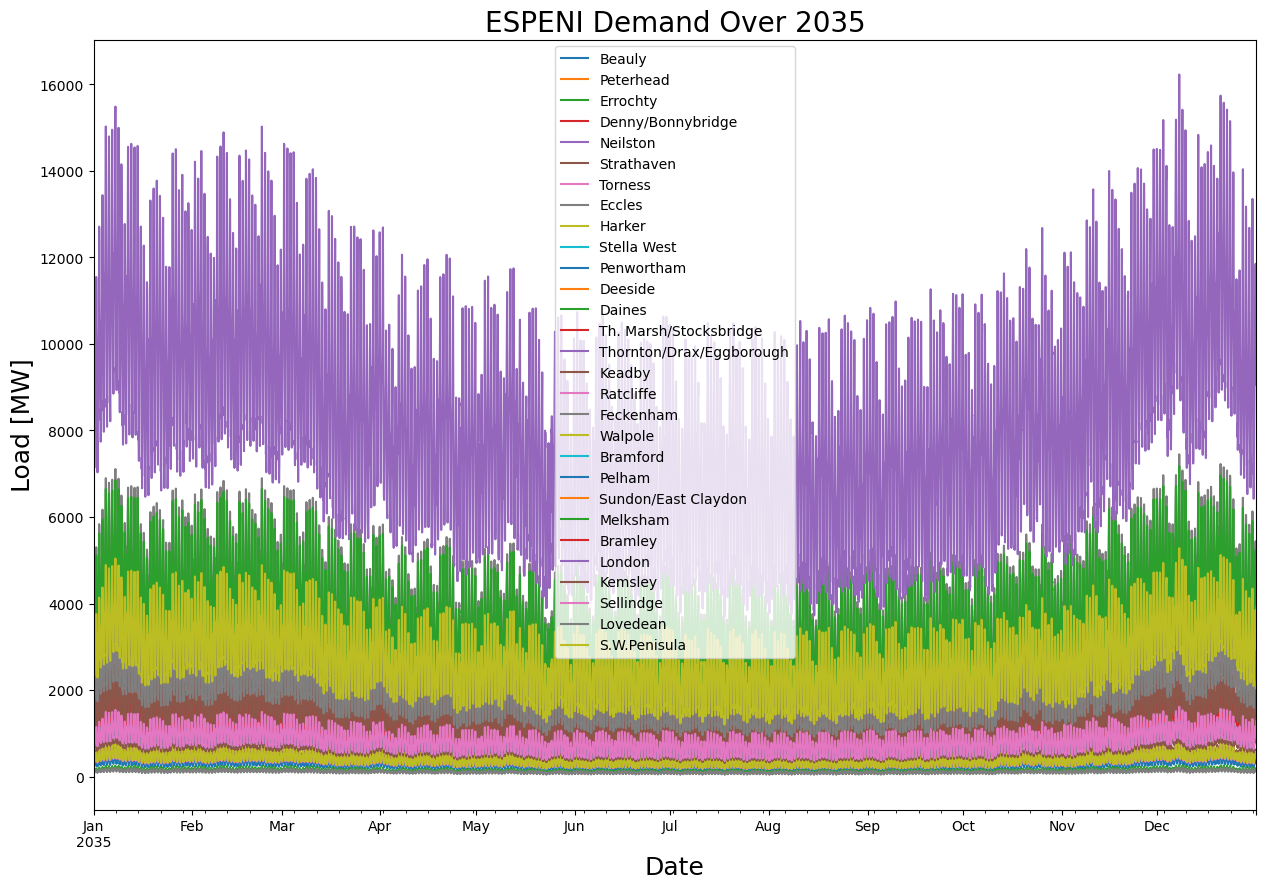

Demand data has been saved to LOPF_data/demand_data_over_time.csv


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Correct the file path as needed
file_path = 'LOPF_data/loads-p_set.csv'

# Read the loads data from the CSV file
df_loads = pd.read_csv(file_path, index_col=0)

# Convert the index to datetime for accurate plotting
df_loads.index = pd.to_datetime(df_loads.index)

# Save the demand data to a new CSV file
output_file_path = 'LOPF_data/demand_data_over_time.csv'
df_loads.to_csv(output_file_path)

# Plot the load data
df_loads.plot(linestyle='-', figsize=(15, 10))

# Customize the plot
plt.title('ESPENI Demand Over 2035', fontsize=20)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Load [MW]', fontsize=18)

# Display the plot
plt.show()

print(f"Demand data has been saved to {output_file_path}")


In [9]:
df_loads['Total'] = df_loads.sum(axis=1)

Text(0, 0.5, 'Load [MW]')

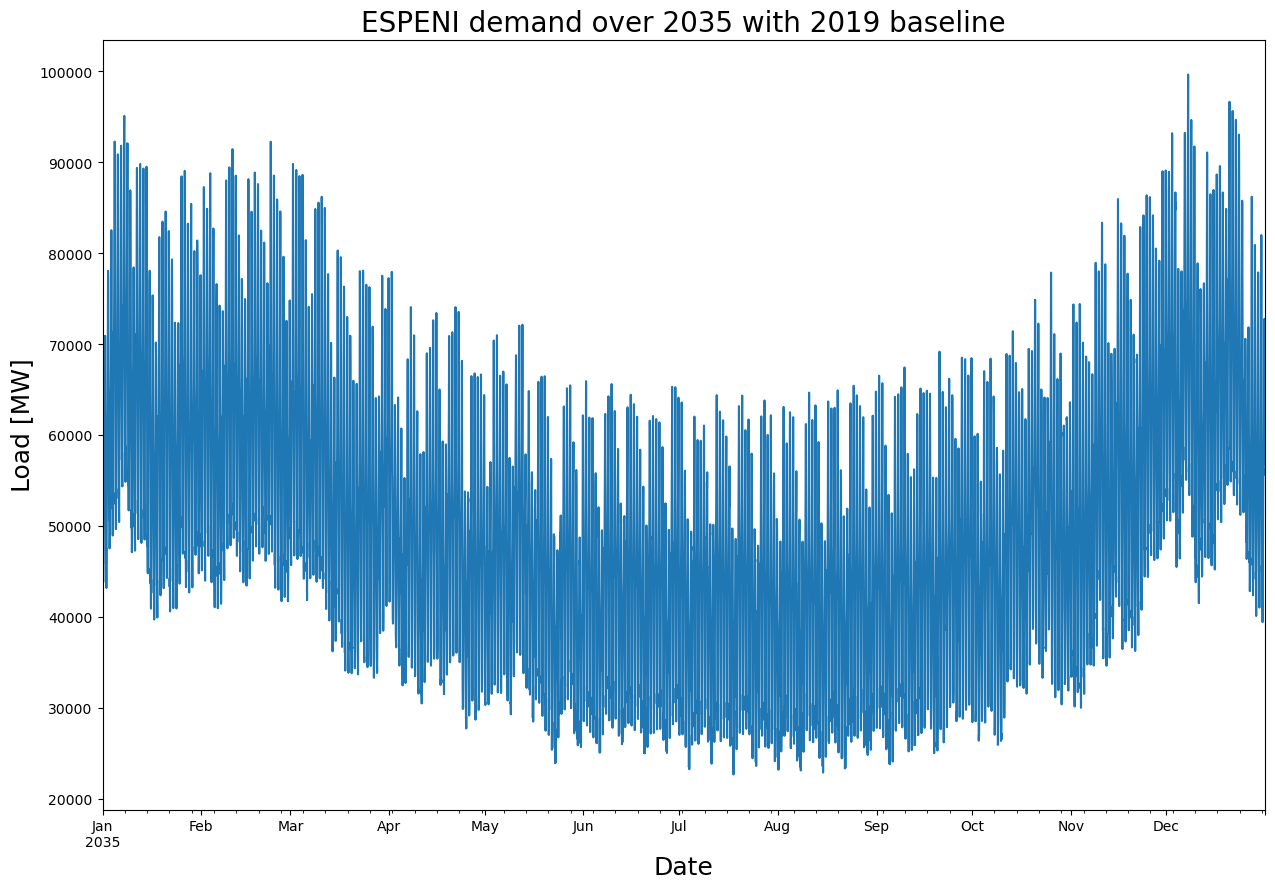

In [10]:
df_loads['Total'].plot(linestyle='-', figsize=(15,10))
plt.title('ESPENI demand over 2035 with 2019 baseline', fontsize=20)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Load [MW]', fontsize=18)

In [11]:
df_FES = pd.read_excel(
            '../data/FES2021/FES 2021 Data Workbook V04.xlsx',
            sheet_name='ED1', header=4, dtype=str)
df_FES_demand = df_FES.loc[df_FES['Data item'] == 'GBFES System Demand: Total']
scenario = 'Leading the Way'
df_FES_demand = df_FES_demand.loc[df_FES_demand['Scenario'] == scenario]
date = str(year) + '-01-01 00:00:00'
df_FES_demand.columns = df_FES_demand.columns.astype(str)
# future demand in GWh/yr
future_demand = df_FES_demand[date].values[0]
print(future_demand + ' GWh/year' + ' future total system demand in ' + str(year) + ' from FES2021 workbook')

445394 GWh/year future total system demand in 2035 from FES2021 workbook


In [12]:
print(str(round(df_loads['Total'].sum() / 2000, 0)) + ' GWh/year' + ' future total system demand in ' + str(year) + ' from checking dataframe by summing')

445394.0 GWh/year future total system demand in 2035 from checking dataframe by summing


In [13]:
#peak loads in 2021

In [14]:
# Leading the way, 2050 Electricity S ystem ACS (Average Cold Spell) Peak Demand GW
peak_FES = 94.7

In [15]:
df_loads.max()

Beauly                        541.763257
Peterhead                     840.051434
Errochty                      268.341520
Denny/Bonnybridge            2389.337046
Neilston                     2831.603552
Strathaven                    861.602963
Torness                       746.854837
Eccles                        213.338322
Harker                        785.340722
Stella West                  4767.501132
Penwortham                   2630.398961
Deeside                      5385.439796
Daines                       5462.922256
Th. Marsh/Stocksbridge       4573.459427
Thornton/Drax/Eggborough     3969.385489
Keadby                       1414.555299
Ratcliffe                    3650.527539
Feckenham                    7447.746879
Walpole                      1750.611548
Bramford                     2617.445654
Pelham                       1624.126319
Sundon/East Claydon          5402.528197
Melksham                     7177.600101
Bramley                      2448.879762
London          

In [16]:
df_loads_smoothed = df_loads.rolling(48, min_periods=1).mean()
df_loads_smoothed.max()

Beauly                        403.450656
Peterhead                     625.585619
Errochty                      199.833712
Denny/Bonnybridge            1779.337351
Neilston                     2108.692858
Strathaven                    641.635025
Torness                       556.182188
Eccles                        158.872875
Harker                        584.842596
Stella West                  3550.354209
Penwortham                   1958.855963
Deeside                      4010.532628
Daines                       4068.233753
Th. Marsh/Stocksbridge       3405.851509
Thornton/Drax/Eggborough     2955.998140
Keadby                       1053.418178
Ratcliffe                    2718.544884
Feckenham                    5546.331032
Walpole                      1303.678993
Bramford                     1949.209646
Pelham                       1209.485546
Sundon/East Claydon          4023.258346
Melksham                     5345.152947
Bramley                      1823.678764
London          

In [17]:
#print dataframe
print("df_loads:")
print(df_loads)

df_loads:
                         Beauly   Peterhead    Errochty  Denny/Bonnybridge  \
name                                                                         
2035-01-01 00:00:00  311.457777  482.942593  154.268589        1373.621403   
2035-01-01 00:30:00  287.035106  445.073100  142.171762        1265.910160   
2035-01-01 01:00:00  271.266189  420.622012  134.361237        1196.364549   
2035-01-01 01:30:00  264.151027  409.589329  130.837016        1164.984569   
2035-01-01 02:00:00  263.590585  408.720314  130.559423        1162.512851   
...                         ...         ...         ...                ...   
2035-12-31 21:30:00  340.950843  528.674178  168.876841        1503.694591   
2035-12-31 22:00:00  321.703249  498.829096  159.343289        1418.806980   
2035-12-31 22:30:00  311.119455  482.417995  154.101014        1372.129300   
2035-12-31 23:00:00  309.199460  479.440874  153.150019        1363.661551   
2035-12-31 23:30:00  309.199460  479.440874  153.15001

In [18]:
print("df_loads_smoothed:")
print(df_loads_smoothed)

df_loads_smoothed:
                         Beauly   Peterhead    Errochty  Denny/Bonnybridge  \
name                                                                         
2035-01-01 00:00:00  311.457777  482.942593  154.268589        1373.621403   
2035-01-01 00:30:00  299.246442  464.007847  148.220176        1319.765782   
2035-01-01 01:00:00  289.919691  449.545902  143.600530        1278.632037   
2035-01-01 01:30:00  283.477525  439.556759  140.409651        1250.220170   
2035-01-01 02:00:00  279.500137  433.389470  138.439606        1232.678706   
...                         ...         ...         ...                ...   
2035-12-31 21:30:00  303.786916  471.048250  150.469124        1339.790623   
2035-12-31 22:00:00  302.818397  469.546477  149.989406        1335.519166   
2035-12-31 22:30:00  302.093269  468.422102  149.630242        1332.321136   
2035-12-31 23:00:00  301.758764  467.903423  149.464557        1330.845870   
2035-12-31 23:30:00  301.784052  467.942635  

In [19]:
print("Columns in df_loads:")
print(df_loads.columns)

print("\nColumns in df_loads_smoothed:")
print(df_loads_smoothed.columns)


Columns in df_loads:
Index(['Beauly', 'Peterhead', 'Errochty', 'Denny/Bonnybridge', 'Neilston',
       'Strathaven', 'Torness', 'Eccles', 'Harker', 'Stella West',
       'Penwortham', 'Deeside', 'Daines', 'Th. Marsh/Stocksbridge',
       'Thornton/Drax/Eggborough', 'Keadby', 'Ratcliffe', 'Feckenham',
       'Walpole', 'Bramford', 'Pelham', 'Sundon/East Claydon', 'Melksham',
       'Bramley', 'London', 'Kemsley', 'Sellindge', 'Lovedean', 'S.W.Penisula',
       'Total'],
      dtype='object')

Columns in df_loads_smoothed:
Index(['Beauly', 'Peterhead', 'Errochty', 'Denny/Bonnybridge', 'Neilston',
       'Strathaven', 'Torness', 'Eccles', 'Harker', 'Stella West',
       'Penwortham', 'Deeside', 'Daines', 'Th. Marsh/Stocksbridge',
       'Thornton/Drax/Eggborough', 'Keadby', 'Ratcliffe', 'Feckenham',
       'Walpole', 'Bramford', 'Pelham', 'Sundon/East Claydon', 'Melksham',
       'Bramley', 'London', 'Kemsley', 'Sellindge', 'Lovedean', 'S.W.Penisula',
       'Total'],
      dtype='object'

Columns in df_loads:
Index(['Total', 'OtherLoad'], dtype='object')

Columns in df_loads_smoothed:
Index(['Total', 'OtherLoad'], dtype='object')

First few rows of df_loads:
                         Total  OtherLoad
2021-01-01 00:00:00  49.263738  48.447430
2021-01-01 01:00:00  13.761846   1.288976
2021-01-01 02:00:00  93.608667   7.873629
2021-01-01 03:00:00  34.157099   1.945148
2021-01-01 04:00:00  62.765649  37.051928

First few rows of df_loads_smoothed:
                         Total  OtherLoad
2021-01-01 00:00:00  49.263738  48.447430
2021-01-01 01:00:00  31.512792  24.868203
2021-01-01 02:00:00  52.211417  19.203345
2021-01-01 03:00:00  47.697837  14.888796
2021-01-01 04:00:00  50.711400  19.321422


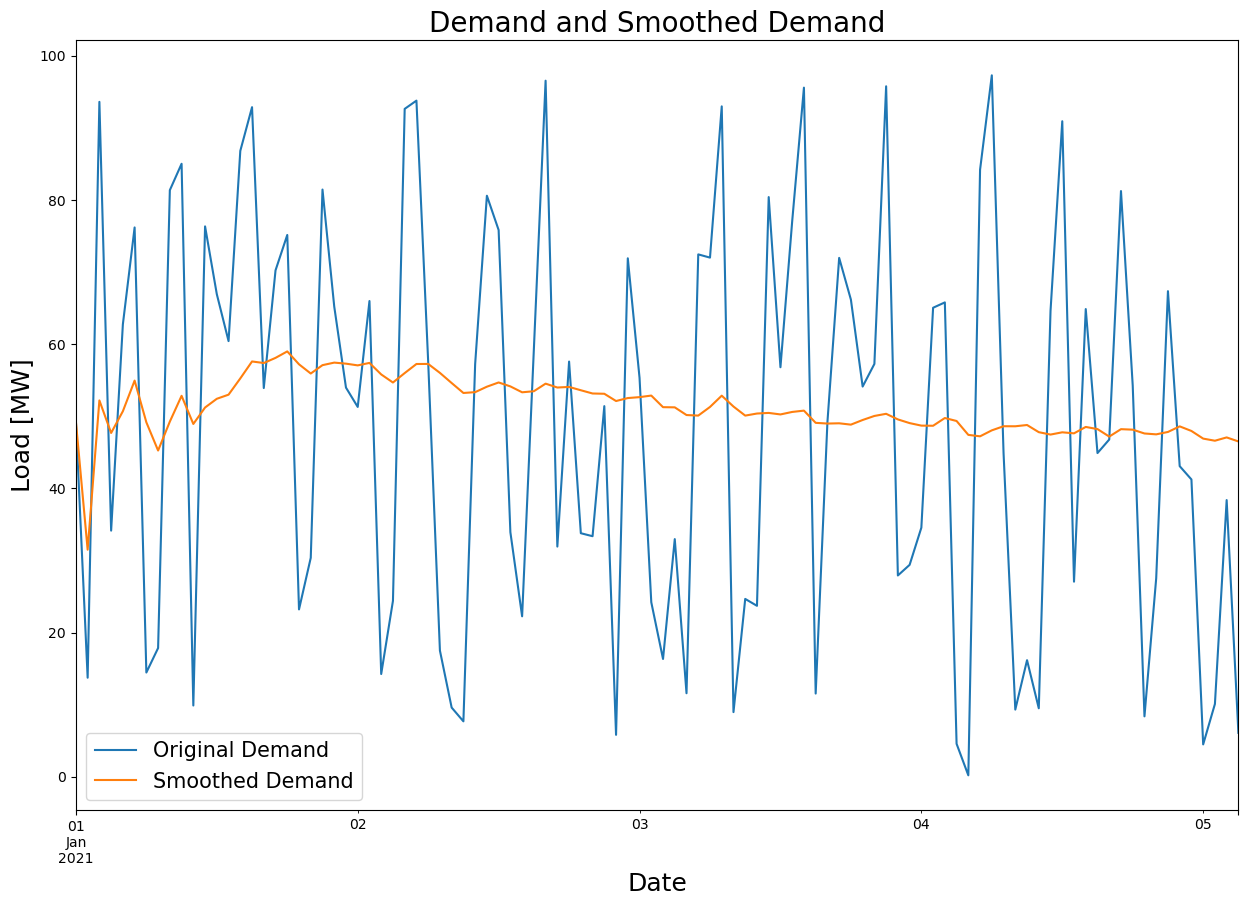

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample DataFrame with some load data
dates = pd.date_range(start='2021-01-01', periods=100, freq='H')
data = {
    'Total': np.random.rand(100) * 100,  # Load data in MW
    'OtherLoad': np.random.rand(100) * 50  # Another column of load data
}
df_loads = pd.DataFrame(data, index=dates)

# Applying rolling mean with window size of 48 and minimum periods of 1
df_loads_smoothed = df_loads.rolling(48, min_periods=1).mean()

# Inspecting column names and data
print("Columns in df_loads:")
print(df_loads.columns)

print("\nColumns in df_loads_smoothed:")
print(df_loads_smoothed.columns)

print("\nFirst few rows of df_loads:")
print(df_loads.head())

print("\nFirst few rows of df_loads_smoothed:")
print(df_loads_smoothed.head())

# Plotting the original and smoothed load data
if 'Total' in df_loads.columns and 'Total' in df_loads_smoothed.columns:
    plt.figure(figsize=(15, 10))

    # Plot original load
    df_loads['Total'].plot(linestyle='-', label='Original Demand')

    # Plot smoothed load
    df_loads_smoothed['Total'].plot(linestyle='-', label='Smoothed Demand')

    # Adding title and labels
    plt.title('Demand and Smoothed Demand', fontsize=20)
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Load [MW]', fontsize=18)

    # Adding a legend to differentiate between the two plots
    plt.legend(fontsize=15)

    # Display the plot
    plt.show()
else:
    print("Column 'Total' not found in one or both DataFrames.")


In [21]:
import pandas as pd
import numpy as np

# Sample DataFrame with some load data
dates = pd.date_range(start='2021-01-01', periods=100, freq='H')
data = {
    'Total': np.random.rand(100) * 100,  # Load data in MW
    'OtherLoad': np.random.rand(100) * 50  # Another column of load data
}
df_loads = pd.DataFrame(data, index=dates)

# Downloading the DataFrame to a CSV file
df_loads.to_csv('df_loads.csv', index=True)


Text(0, 0.5, 'Load [MW]')

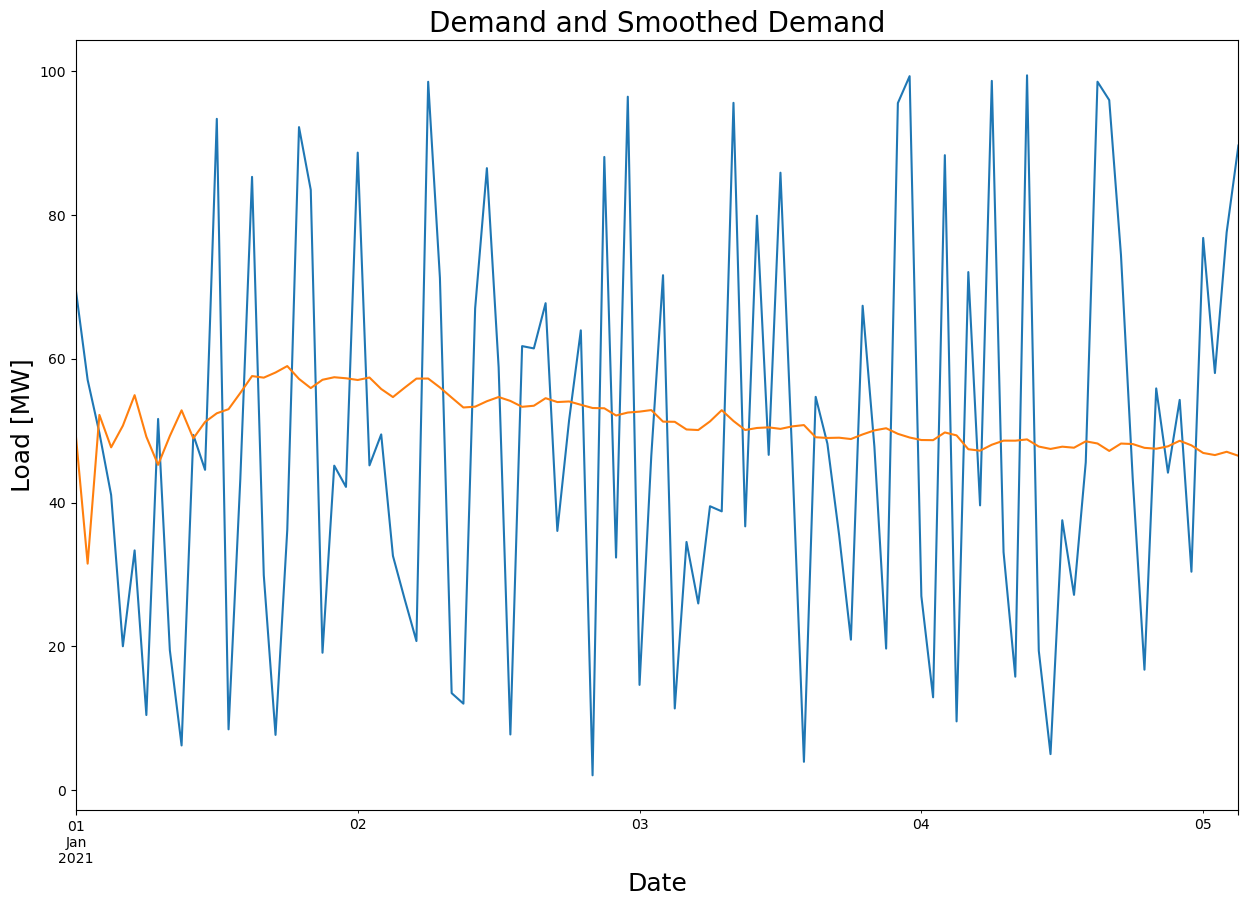

In [22]:
df_loads['Total']
date_from = '2021-01-01 00:00:00'
date_to = '2021-02-08 00:00:00'

df_loads['Total'].loc[date_from:date_to].plot(linestyle='-', figsize=(15,10))
df_loads_smoothed['Total'].loc[date_from:date_to].plot(linestyle='-', figsize=(15,10))
plt.title('Demand and Smoothed Demand', fontsize=20)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Load [MW]', fontsize=18)

In [23]:
import os
from dotenv import find_dotenv, load_dotenv

load_dotenv(find_dotenv())
src_path = os.environ.get('PROJECT_SRC')
os.chdir(src_path)

In [24]:
from data_reader_writer import data_writer
import marginal_costs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [25]:
year = 2035

In [26]:
start = str(year) + '-01-01 00:00:00'
end = str(year) + '-12-31 23:30:00'
# time step as fraction of hour
time_step = 0.5
if year > 2020:
    data_writer(start, end, time_step, year, demand_dataset='eload', year_baseline=2012, scenario='Leading The Way', FES=2022)
if year <= 2020:
    data_writer(start, end, time_step, year, demand_dataset='historical')

C:\Python\Great_Britain\PyPSA-GB\PyPSA-GB\distance_calculator.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data_point = {'lon': df['x'][i], 'lat': df['y'][i]}
C:\Python\Great_Britain\PyPSA-GB\PyPSA-GB\generators.py:795: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df.index = pd.to_datetime(df.index, infer_datetime_format=True)
C:\Python\Great_Britain\PyPSA-GB\PyPSA-GB\distance_calculator.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To ac

In [27]:
df_generators = pd.read_csv('LOPF_data/generators.csv', index_col=0)
df_generators

carrier  \
name                                                                
West Burton                                                  Coal   
Hywind Scotland Pilot Park (Hywind 2) Demonstrator  Wind Offshore   
Beatrice Demonstrator                               Wind Offshore   
Burbo Bank                                          Wind Offshore   
Gunfleet Sands - (Demo) Extension                   Wind Offshore   
...                                                           ...   
Unmet Load London                                      Unmet Load   
Unmet Load Kemsley                                     Unmet Load   
Unmet Load Sellindge                                   Unmet Load   
Unmet Load Lovedean                                    Unmet Load   
Unmet Load S.W.Penisula                                Unmet Load   

                                                                  type  \
name                                                                     
West Burton                                         Conventional steam   
Hywind Scotland Pilot Park (Hywind 2) Demonstrator       Wind Offshore   
Beatrice Demonstrator                                    Wind Offshore   
Burbo Bank                                               Wind Offshore   
Gunfleet Sands - (Demo) Extension                        Wind Offshore   
...                                                                ...   
Unmet Load London                                           Unmet Load   
Unmet Load Kemsley                                          Unmet Load   
Unmet Load Sellindge                                        Unmet Load   
Unmet Load Lovedean                                         Unmet Load   
Unmet Load S.W.Penisula                                     Unmet Load   

                                                           p_nom  \
name                                                               
West Burton                                         0.000000e+00   
Hywind Scotland Pilot Park (Hywind 2) Demonstrator  3.086314e+01   
Beatrice Demonstrator                               1.028771e+01   
Burbo Bank                                          1.762957e+02   
Gunfleet Sands - (Demo) Extension                   2.350609e+01   
...                                                          ...   
Unmet Load London                                   1.000000e+09   
Unmet Load Kemsley                                  1.000000e+09   
Unmet Load Sellindge                                1.000000e+09   
Unmet Load Lovedean                                 1.000000e+09   
Unmet Load S.W.Penisula                             1.000000e+09   

                                                             bus  \
name                                                               
West Burton                                               Keadby   
Hywind Scotland Pilot Park (Hywind 2) Demonstrator     Peterhead   
Beatrice Demonstrator                                  Peterhead   
Burbo Bank                                               Deeside   
Gunfleet Sands - (Demo) Extension                       Bramford   
...                                                          ...   
Unmet Load London                                         London   
Unmet Load Kemsley                                       Kemsley   
Unmet Load Sellindge                                   Sellindge   
Unmet Load Lovedean                                     Lovedean   
Unmet Load S.W.Penisula                             S.W.Penisula   

                                                    Turbine Capacity (MW)  \
name                                                                        
West Burton                                                           NaN   
Hywind Scotland Pilot Park (Hywind 2) Demonstrator                    NaN   
Beatrice Demonstrator                                                 NaN   
Burbo Bank                                

In [28]:
df_generators.loc[df_generators['carrier'] == 'Wind Offshore']

carrier  \
name                                                                
Hywind Scotland Pilot Park (Hywind 2) Demonstrator  Wind Offshore   
Beatrice Demonstrator                               Wind Offshore   
Burbo Bank                                          Wind Offshore   
Gunfleet Sands - (Demo) Extension                   Wind Offshore   
Gunfleet Sands II                                   Wind Offshore   
...                                                           ...   
NE7                                                 Wind Offshore   
NE8                                                 Wind Offshore   
E1                                                  Wind Offshore   
E2                                                  Wind Offshore   
E3                                                  Wind Offshore   

                                                             type  \
name                                                                
Hywind Scotland Pilot Park (Hywind 2) Demonstrator  Wind Offshore   
Beatrice Demonstrator                               Wind Offshore   
Burbo Bank                                          Wind Offshore   
Gunfleet Sands - (Demo) Extension                   Wind Offshore   
Gunfleet Sands II                                   Wind Offshore   
...                                                           ...   
NE7                                                 Floating Wind   
NE8                                                 Floating Wind   
E1                                                  Floating Wind   
E2                                                  Floating Wind   
E3                                                  Floating Wind   

                                                          p_nom        bus  \
name                                                                         
Hywind Scotland Pilot Park (Hywind 2) Demonstrator    30.863140  Peterhead   
Beatrice Demonstrator                                 10.287713  Peterhead   
Burbo Bank                                           176.295708    Deeside   
Gunfleet Sands - (Demo) Extension                     23.506094   Bramford   
Gunfleet Sands II                                    126.932916   Bramford   
...                                                         ...        ...   
NE7                                                 3086.314033  Peterhead   
NE8                                                 1028.771344  Peterhead   
E1                                                  3086.314033  Peterhead   
E2                                                  2057.542689  Peterhead   
E3                                                  1028.771344  Peterhead   

                                                    Turbine Capacity (MW)  \
name                                                                        
Hywind Scotland Pilot Park (Hywind 2) Demonstrator                    NaN   
Beatrice Demonstrator                                                 NaN   
Burbo Bank                                                            NaN   
Gunfleet Sands - (Demo) Extension                                     NaN   
Gunfleet Sands II                                                     NaN   
...                                                                   ...   
NE7                                                                  15.0   
NE8                                                                  15.0   
E1                                                                   15.0   
E2                                                                   15.0   
E3                                                                   15.0   

                                                    marginal_cost  \
name                                                                
Hywind Scotland Pilot Park (Hywind 2) Demonstrator            0.0   
Beatrice Demonstrator                 

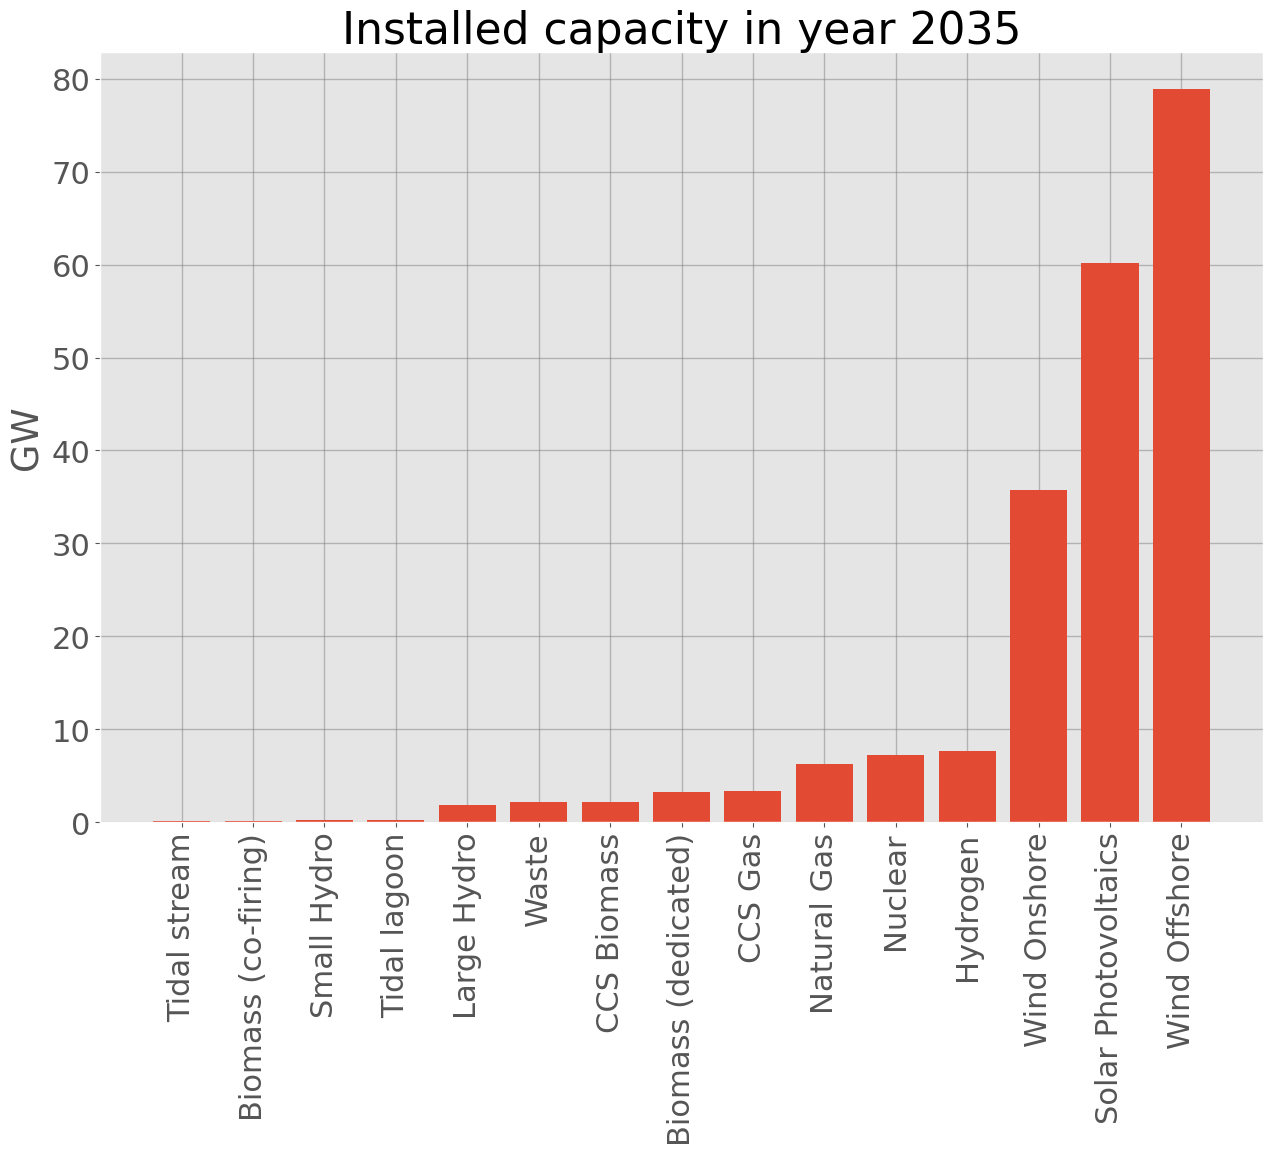

In [29]:
generators_p_nom = df_generators.p_nom.groupby(
    df_generators.carrier).sum().sort_values()
if year > 2020:
    generators_p_nom.drop('Unmet Load', inplace=True)
generators_p_nom.drop(generators_p_nom[generators_p_nom < 50].index, inplace=True)

plt.rcParams.update({'font.size': 22})
# bar chart
plt.figure(figsize=(15,10))
plt.bar(generators_p_nom.index, generators_p_nom.values / 1000)
plt.xticks(generators_p_nom.index, rotation=90)
plt.ylabel('GW')
plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)
plt.title('Installed capacity in year ' + str(year))
plt.show()

In [30]:
generators_p_nom

carrier
Tidal stream             133.000000
Biomass (co-firing)      170.000000
Small Hydro              246.397646
Tidal lagoon             262.000000
Large Hydro             1880.367356
Waste                   2146.659021
CCS Biomass             2199.999980
Biomass (dedicated)     3237.710000
CCS Gas                 3310.000006
Natural Gas             6238.973852
Nuclear                 7180.000000
Hydrogen                7642.340000
Wind Onshore           35762.760000
Solar Photovoltaics    60208.240000
Wind Offshore          78920.470000
Name: p_nom, dtype: float64

In [1]:
df = pd.read_excel('../data/marginal_cost_data.xlsx', sheet_name=None)

fuel_prices = marginal_costs.fuel_prices_df(df)
carbon_support_price = marginal_costs.carbon_support_price_df(df)
EU_ETS = marginal_costs.EU_ETS_df(df)
EU_ETS.set_index(fuel_prices.index, inplace=True)

result = pd.concat([fuel_prices, carbon_support_price, EU_ETS], axis=1)

# exchange euros for pounds
exch = {2010: 0.8583,
        2011: 0.8678,
        2012: 0.8113,
        2013: 0.8492,
        2014: 0.8061,
        2015: 0.7263,
        2016: 0.8193,
        2017: 0.8766,
        2018: 0.8850,
        2019: 0.8773,
        2020: 0.8897}

for year in range(2010, 2021):
    result.loc[:, 'EU ETS (Euros/tonne)'].loc[str(year): str(year)] *= exch[year]
result.rename(
    columns={'EU ETS (Euros/tonne)': 'EU ETS (Pounds/tonne)'},
    inplace=True)

# these are from
# https://www.parliament.uk/globalassets/documents/post/postpn_383-carbon-footprint-electricity-generation.pdf
coal_emission_factor = 846
# really should be different between OCGT and CCGT
gas_emission_factor = 488
# need better reference for oil
# https://www.jcm.go.jp/cl-jp/methodologies/68/attached_document2
oil_emission_factor = 533

result.loc[:, 'Gas carbon tax (p/kWh)'] = (
    result['Carbon support price (Pounds/tonne)'] +
    result['EU ETS (Pounds/tonne)']) * gas_emission_factor / 10000
result.loc[:, 'Coal carbon tax (p/kWh)'] = (
    result['Carbon support price (Pounds/tonne)'] +
    result['EU ETS (Pounds/tonne)']) * coal_emission_factor / 10000
result.loc[:, 'Oil carbon tax (p/kWh)'] = (
    result['Carbon support price (Pounds/tonne)'] +
    result['EU ETS (Pounds/tonne)']) * oil_emission_factor / 10000

# converting to £/MWh
result.loc[:, 'Gas'] = (
    result['Gas carbon tax (p/kWh)'] +
    result['Gas (p/kWh)']) * 10
result.loc[:, 'Coal'] = (
    result['Coal carbon tax (p/kWh)'] +
    result['Coal (p/kWh)']) * 10
result.loc[:, 'Oil'] = (
    result['Oil carbon tax (p/kWh)'] +
    result['Oil (p/kWh)']) * 10

frame = {'Coal fuel price (£/MWh)': result['Coal (p/kWh)'] * 10,
         'Carbon support price (£/MWh)': result['Carbon support price (Pounds/tonne)'] * coal_emission_factor / 10000 * 10,
         'EU ETS (£/MWh)': result['EU ETS (Pounds/tonne)'] * coal_emission_factor / 10000 * 10}
df_coal = pd.DataFrame(frame)
df_coal.plot.area(figsize=(15,10))
plt.title('What constitutes the marginal price for coal?')
plt.show()

NameError: name 'pd' is not defined

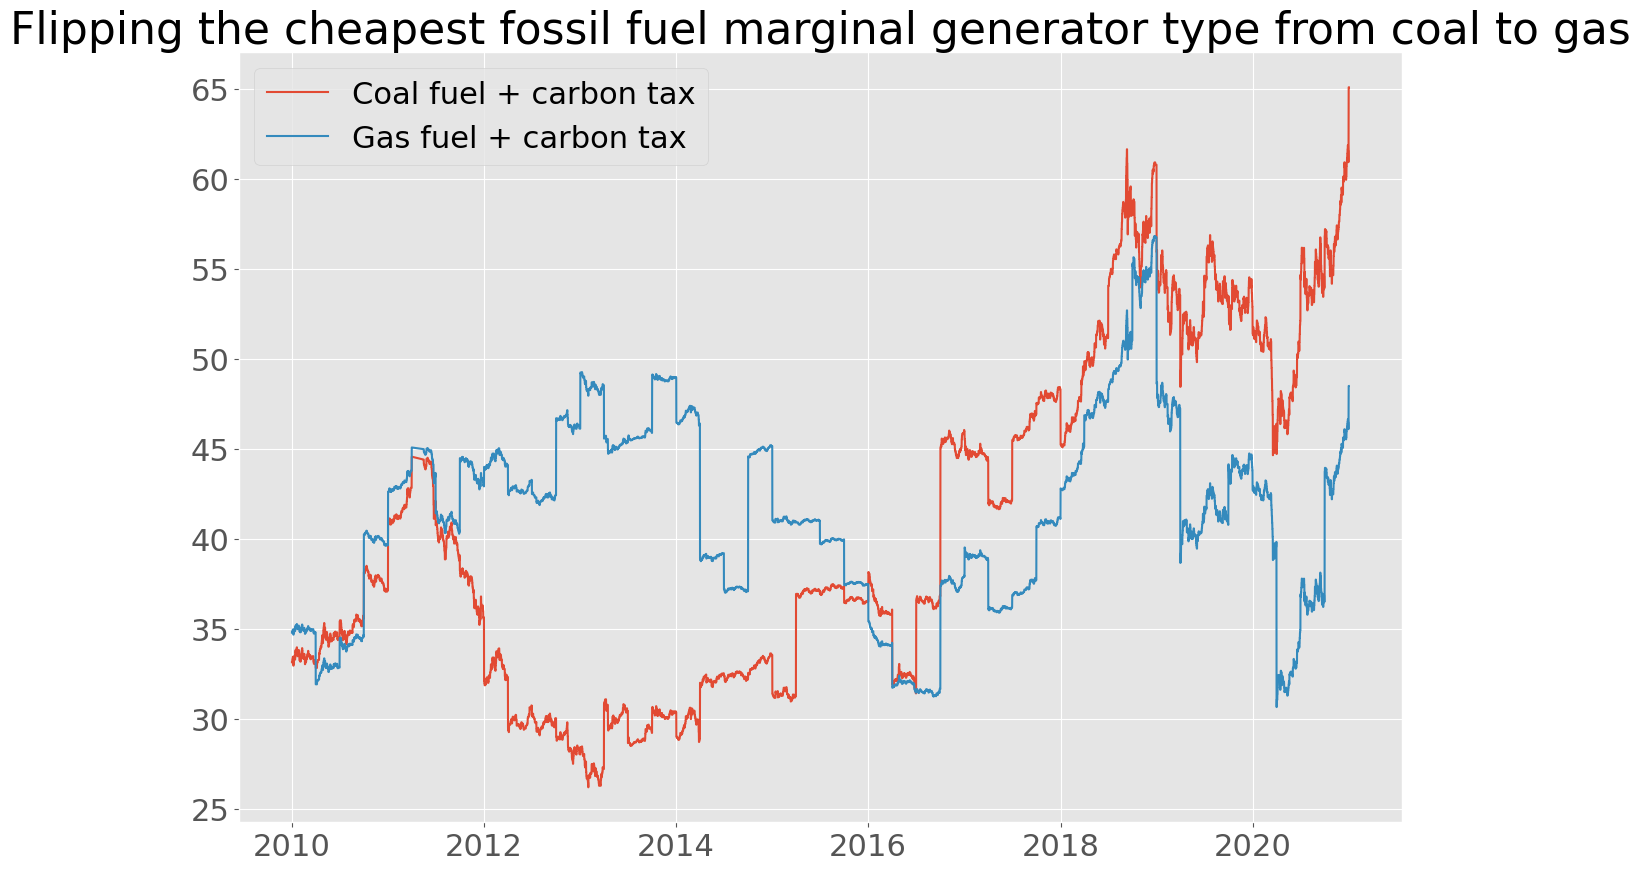

In [32]:
plt.rcParams["figure.figsize"] = (15,10)
plt.plot(result['Coal'], label='Coal fuel + carbon tax')
plt.plot(result['Gas'], label='Gas fuel + carbon tax')
plt.legend(loc='best')
plt.title('Flipping the cheapest fossil fuel marginal generator type from coal to gas')
plt.show()

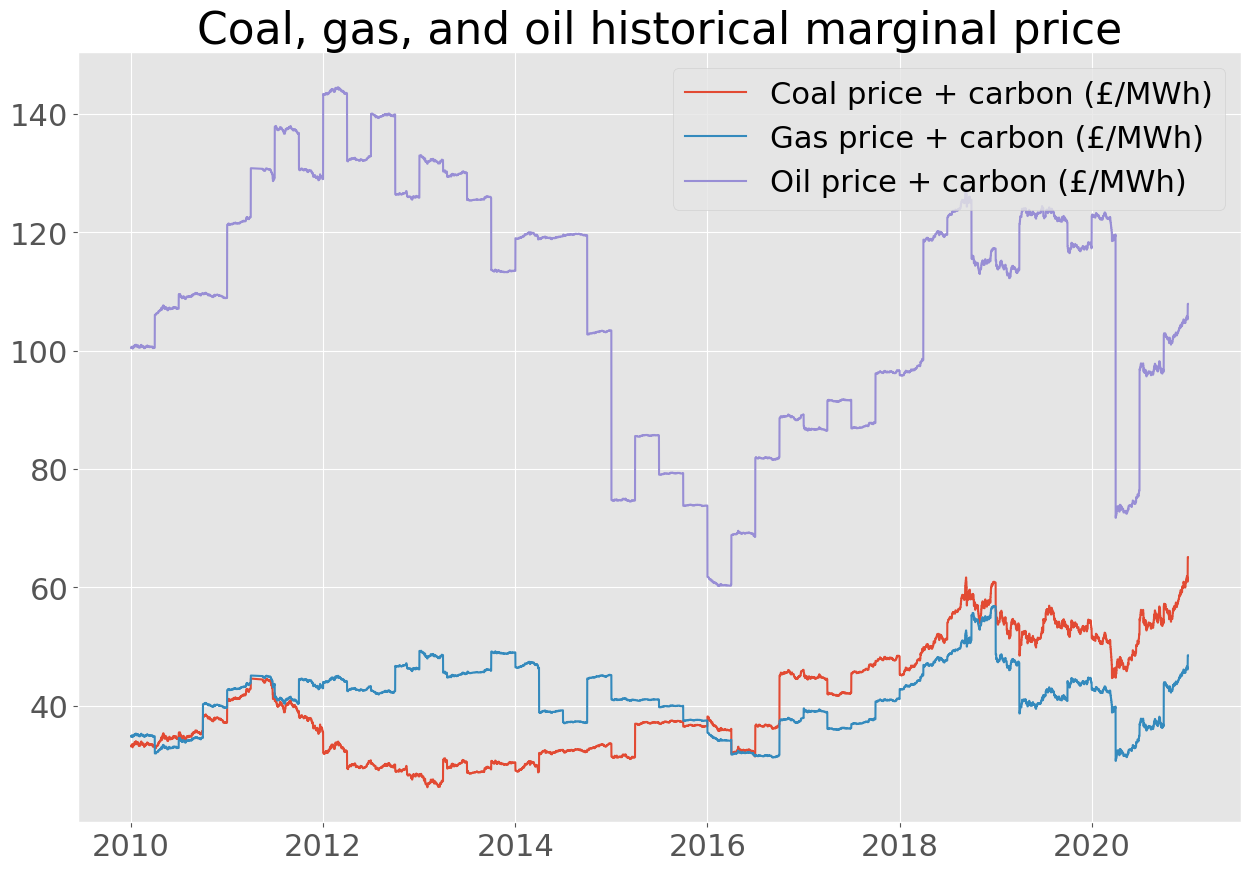

In [33]:
marginal_prices = result[['Coal', 'Gas', 'Oil']].copy()
plt.plot(marginal_prices)
plt.legend(['Coal price + carbon (£/MWh)', 'Gas price + carbon (£/MWh)', 'Oil price + carbon (£/MWh)'], loc='best')
plt.title('Coal, gas, and oil historical marginal price')
plt.show()

In [34]:
# add the future prices
FES = 2022
future_fuel_price = marginal_costs.future_fuel_prices_df(FES)
future_fuel_price = future_fuel_price.apply(pd.to_numeric, errors='coerce')
future_carbon_price = marginal_costs.future_carbon_prices_df(FES)
future_carbon_price = future_carbon_price.apply(pd.to_numeric, errors='coerce')

future_result = pd.concat([future_fuel_price, future_carbon_price], axis=1)

future_result.loc[:, 'Gas carbon tax (p/kWh)'] = (
    future_result['High case']) * gas_emission_factor / 10000
future_result.loc[:, 'Coal carbon tax (p/kWh)'] = (
    future_result['High case']) * coal_emission_factor / 10000
future_result.loc[:, 'Oil carbon tax (p/kWh)'] = (
    future_result['High case']) * oil_emission_factor / 10000

# converting to £/MWh
# gas is in p/therm, divide by 29.3 * 0.5 = 14.65, assume elec efficiency 50%
# this gets us to p/kWh, then * 10 to get £/MWh
future_result.loc[:, 'Gas'] = (
    future_result['Gas carbon tax (p/kWh)'] * 10 +
    future_result['Gas price'] * 10 / 14.65)
# coal is in USD per tonne, * 0.75 to get pounds
# one tonne can create 2.460 MWh electricity, divide by this
# to get £/MWh
# also a 1.4 fudge factor to get closer to 2020 price
future_result.loc[:, 'Coal'] = (
    future_result['Coal carbon tax (p/kWh)'] * 10 +
    future_result['Coal price'] * 1.4 * 0.8 / 2.460)
# oil is in $ per barrel, so * 0.75 to get pounds
# 1.7 MWh per barrel thermal, so *0.3 to get 0.85 MWh elec
# divide by this to get £/MWh
future_result.loc[:, 'Oil'] = (
    future_result['Oil carbon tax (p/kWh)'] * 10 +
    future_result['Oil price'] * 0.8 / 0.51)

marginal_prices2 = future_result[['Coal', 'Gas', 'Oil']].copy()

marginal_prices = pd.concat([marginal_prices, marginal_prices2], ignore_index=True) #pd.concat
marginal_prices

Coal         Gas         Oil
0        33.14282   34.786835  100.481909
1        33.14282   34.786835  100.481909
2        33.14282   34.786835  100.481909
3        33.14282   34.786835  100.481909
4        33.14282   34.786835  100.481909
...           ...         ...         ...
718795  162.66601  111.018724  144.796921
718796  162.66601  111.018724  144.796921
718797  162.66601  111.018724  144.796921
718798  162.66601  111.018724  144.796921
718799  162.66601  111.018724  144.796921

[718800 rows x 3 columns]

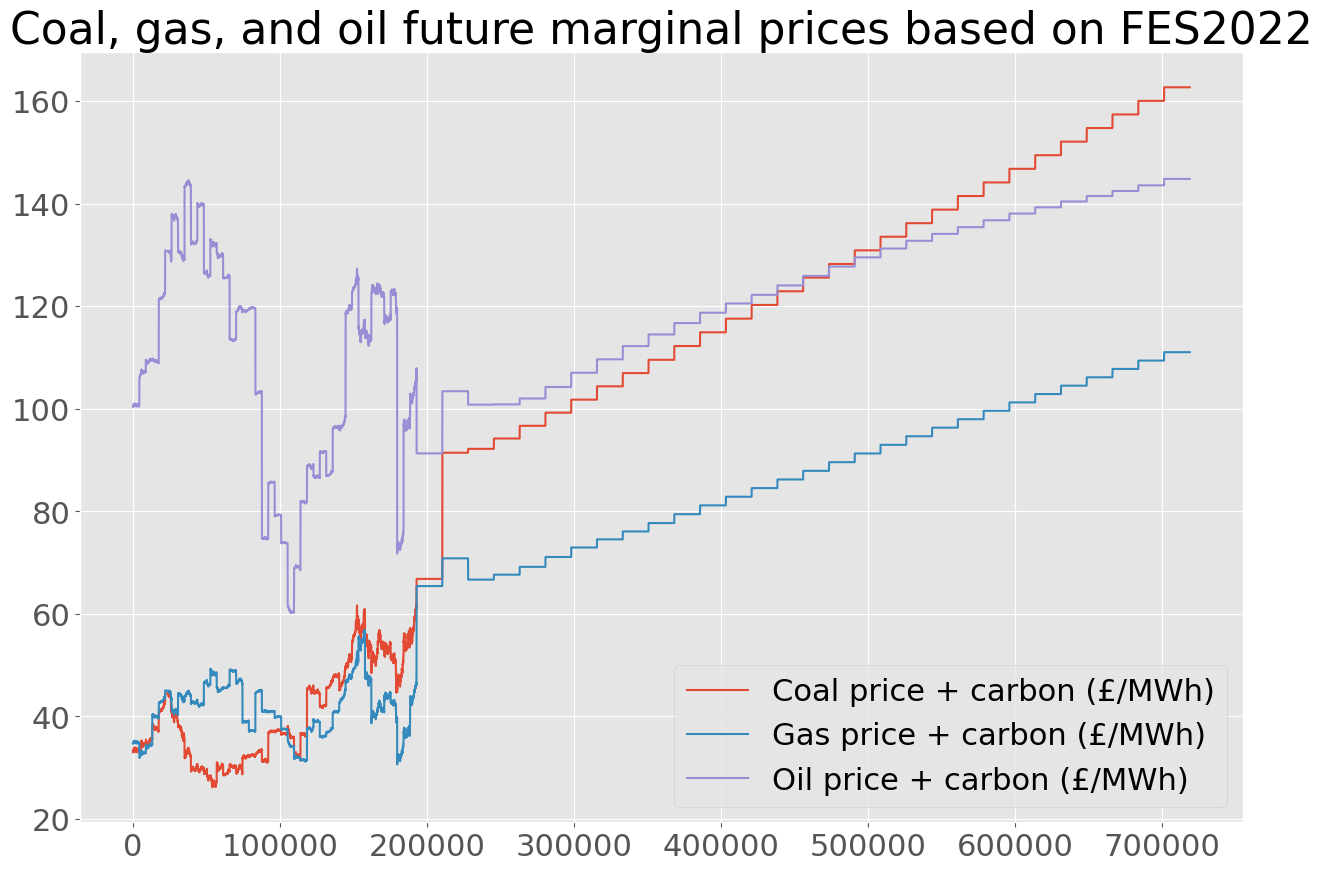

In [35]:
plt.plot(marginal_prices)
plt.legend(['Coal price + carbon (£/MWh)', 'Gas price + carbon (£/MWh)', 'Oil price + carbon (£/MWh)'], loc='best')
plt.title('Coal, gas, and oil future marginal prices based on FES2022')
plt.show()

In [36]:
#simulation for future 

In [37]:
import os
from dotenv import find_dotenv, load_dotenv

load_dotenv(find_dotenv())
src_path = os.environ.get('PROJECT_SRC')
os.chdir(src_path)

In [38]:
import pypsa
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
plt.style.use('ggplot')
import pandas as pd
import cartopy.crs as ccrs

import data_reader_writer

In [39]:
# write csv files for import
start = '2035-01-01 00:00:00'
end = '2035-12-31 23:30:00'
# year of simulation
year = int(start[0:4])
# time step as fraction of hour
time_step = 0.5

In [40]:
scenario = 'Leading The Way'
# scenario = 'Consumer Transformation'
# scenario = 'System Transformation'
# scenario = 'Steady Progression'

In [41]:
year_baseline = 2012

In [42]:
data_reader_writer.data_writer(start, end, time_step, year, demand_dataset='eload', year_baseline=year_baseline,
                               scenario=scenario, FES=2022, merge_generators=True, scale_to_peak=True,
                               networkmodel='Reduced', P2G=True)

C:\Python\Great_Britain\PyPSA-GB\PyPSA-GB\distance_calculator.py:32: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Python\Great_Britain\PyPSA-GB\PyPSA-GB\distance_calculator.py:32: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Python\Great_Britain\PyPSA-GB\PyPSA-GB\generators.py:795: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

C:\Python\Great_Britain\PyPSA-GB\PyPSA-GB\distance_calculator.py:32:

In [43]:
network = pypsa.Network()
network.import_from_csv_folder('LOPF_data')

INFO:pypsa.components:Applying weightings to all columns of `snapshot_weightings`
INFO:pypsa.io:Imported network LOPF_data has buses, generators, lines, links, loads, storage_units


In [44]:
very_high_value = 1e12
network.lines['s_nom'] = very_high_value

In [45]:
#very_high_value = 1e12
#network.links['p_nom'] = very_high_value

In [46]:
contingency_factor = 4
network.lines.s_max_pu *= contingency_factor

In [47]:
#running optimisation

In [48]:
network.lopf(network.snapshots, solver_name="gurobi", pyomo=False)

C:\Users\rachm\AppData\Local\Temp\ipykernel_26612\886280260.py:1: DeprecatedWarning:

lopf is deprecated as of 0.24 and will be removed in 1.0. Use linopy-based function ``n.optimize()`` instead. Migrate extra functionalities: https://pypsa.readthedocs.io/en/latest/examples/optimization-with-linopy-migrate-extra-functionalities.html.

INFO:pypsa.linopf:Prepare linear problem
INFO:pypsa.linopf:Total preparation time: 348.35s
INFO:pypsa.linopf:Solve linear problem using Gurobi solver


Set parameter Username
Academic license - for non-commercial use only - expires 2025-06-04
Read LP format model from file C:\Users\rachm\AppData\Local\Temp\pypsa-problem-kpm03mlp.lp
Reading time = 273.81 seconds
obj: 50877216 rows, 15855601 columns, 89577912 nonzeros
Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (win64 - Windows 11.0 (22631.2))

CPU model: 13th Gen Intel(R) Core(TM) i7-1370P, instruction set [SSE2|AVX|AVX2]
Thread count: 14 physical cores, 20 logical processors, using up to 20 threads

Optimize a model with 50877216 rows, 15855601 columns and 89577912 nonzeros
Model fingerprint: 0xe08e82bf
Coefficient statistics:
  Matrix range     [6e-05, 1e+00]
  Objective range  [5e-01, 5e+08]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e-06, 4e+12]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.
Presolve removed 0 rows and 0 columns (presolve time = 8s) ...
Presolve removed 46760028 rows and 122641 columns (p

INFO:pypsa.linopf:Optimization successful. Objective value: 5.59e+08


('ok', 'optimal')

In [49]:
import pypsa

# Access the lines data
lines_data = network.lines

# Print the lines data
print(lines_data)

# Save lines data to a CSV file
lines_data.to_csv('lines_data.csv', index=False)

              bus0               bus1        r        x       b         s_nom  \
Line                                                                            
0           Beauly          Peterhead  0.01220  0.02000  0.0856  1.000000e+12   
1           Beauly           Errochty  0.00700  0.15000  0.0520  1.000000e+12   
2           Beauly          Peterhead  0.01220  0.02000  0.2844  1.000000e+12   
3           Beauly           Errochty  0.00700  0.15000  0.0520  1.000000e+12   
4        Peterhead  Denny/Bonnybridge  0.00040  0.06500  0.4454  1.000000e+12   
...            ...                ...      ...      ...     ...           ...   
94       Sellindge            Kemsley  0.00020  0.00503  0.1797  1.000000e+12   
95        Lovedean          Sellindge  0.00038  0.00711  0.2998  1.000000e+12   
96        Lovedean          Sellindge  0.00038  0.00711  0.2998  1.000000e+12   
97    S.W.Penisula           Lovedean  0.00051  0.00796  0.3400  1.000000e+12   
98    S.W.Penisula          

In [50]:
# Access the lines data
links_data = network.links

# Print the lines data
print(links_data)

                     bus0          bus1 carrier   p_nom  marginal_cost  \
Link                                                                     
BritNed       Netherlands       Kemsley      DC  1520.0           20.0   
EastWest          Ireland       Deeside      DC   912.0            7.0   
Moyle          N. Ireland      Neilston      DC   912.0            7.0   
Nemo              Belgium     Sellindge      DC  1520.0           20.0   
IFA               France1     Sellindge      DC  3040.0           15.0   
IFA2              France2      Lovedean      DC  1520.0           15.0   
NSL                Norway   Stella West      DC  2128.0            1.0   
ElecLink          France1     Sellindge      DC  1520.0           15.0   
Viking Link       Denmark       Walpole      DC  2128.0            7.0   
Greenlink        Ireland2      Melksham      DC   760.0            7.0   
GridLink          France1       Kemsley      DC  2128.0           15.0   
NeuConnect        Germany       Kemsle

In [51]:
# Access the lines data
buses_data = network.buses

# Print the lines data
print(buses_data)

                          v_nom carrier         x          y type unit  \
Bus                                                                      
Beauly                    275.0      AC -4.533299  57.469876             
Peterhead                 275.0      AC -1.804331  57.484481             
Errochty                  275.0      AC -4.054907  56.724571             
Denny/Bonnybridge         275.0      AC -3.725282  56.109237             
Neilston                  400.0      AC -4.414788  55.808831             
Strathaven                400.0      AC -3.880268  55.753988             
Torness                   400.0      AC -2.507448  55.922401             
Eccles                    400.0      AC -2.229827  55.677255             
Harker                    400.0      AC -2.847820  54.931176             
Stella West               400.0      AC -1.667840  54.987162             
Penwortham                400.0      AC -2.679880  53.776910             
Deeside                   400.0      A

In [1]:
#power output by generation type

In [2]:
p_by_carrier = network.generators_t.p.groupby(
    network.generators.carrier, axis=1).sum()

storage_by_carrier = network.storage_units_t.p.groupby(
    network.storage_units.carrier, axis=1).sum()

# to show on graph set the negative storage values to zero
storage_by_carrier[storage_by_carrier < 0] = 0

p_by_carrier = pd.concat([p_by_carrier, storage_by_carrier], axis=1)

imp = network.links_t.p0.copy()
imp[imp < 0] = 0
imp['Interconnectors Import'] = imp.sum(axis=1)
interconnector_import = imp[['Interconnectors Import']]

p_by_carrier = pd.concat([p_by_carrier, interconnector_import], axis=1)

exp = network.links_t.p0.copy()
exp[exp > 0] = 0
exp['Interconnectors Export'] = exp.sum(axis=1)
interconnector_export = exp[['Interconnectors Export']]

# group biomass stuff
p_by_carrier['Biomass'] = (
    p_by_carrier['Biomass (dedicated)'] + p_by_carrier['Biomass (co-firing)'])

# rename the hydro bit
p_by_carrier = p_by_carrier.rename(
    columns={'Large Hydro': 'Hydro'})
p_by_carrier = p_by_carrier.rename(
    columns={'Interconnector': 'Interconnectors Import'})

generators_p_nom = network.generators.p_nom.groupby(
    network.generators.carrier).sum().sort_values()
if year > 2020:
    generators_p_nom.drop('Unmet Load', inplace=True)
generators_p_nom.drop(generators_p_nom[generators_p_nom < 50].index, inplace=True)

plt.rcParams.update({'font.size': 12})
# bar chart
plt.figure(figsize=(10,4))
plt.bar(generators_p_nom.index, generators_p_nom.values / 1000)
plt.xticks(generators_p_nom.index, rotation=90)
plt.ylabel('GW')
plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)
plt.title('Installed capacity in year ' + str(year))
plt.show()

NameError: name 'network' is not defined

Text(0.5, 0, '')

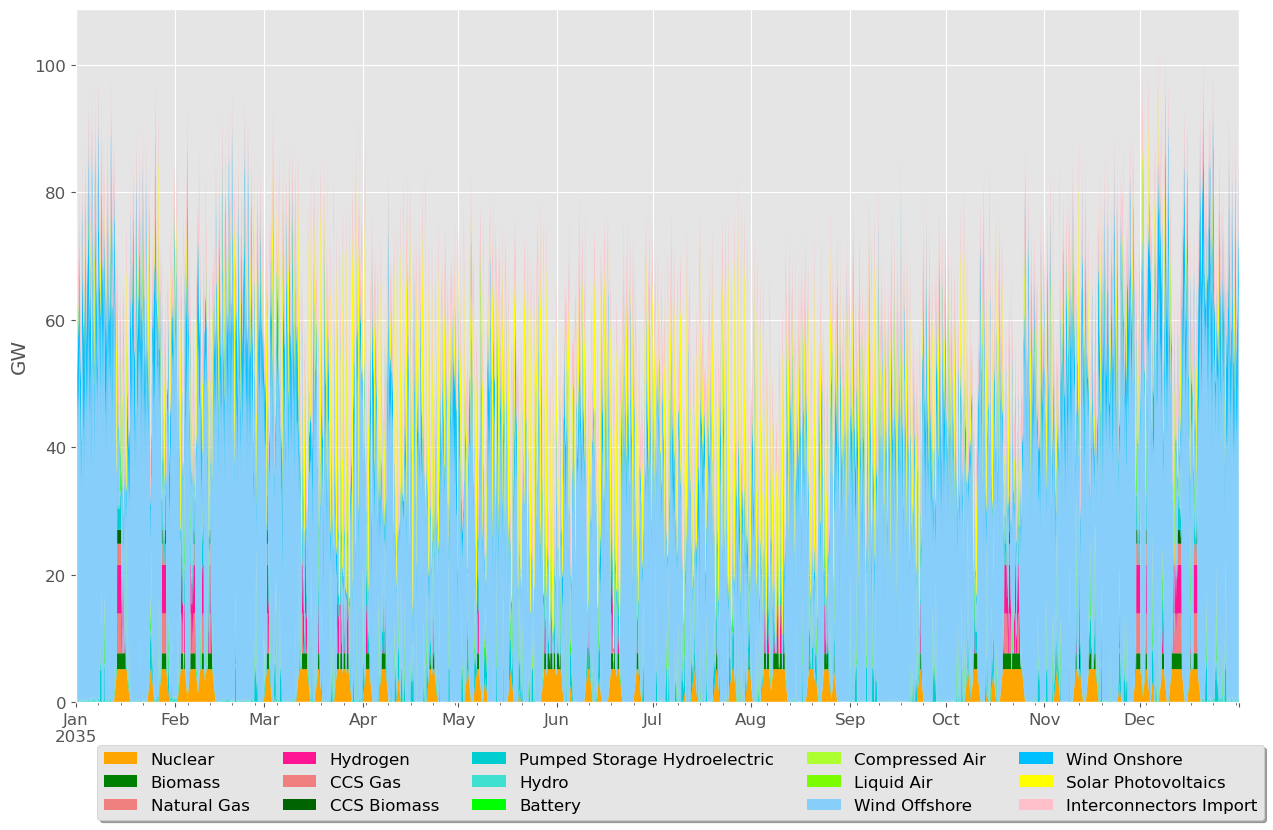

In [54]:
cols = ["Nuclear", 'Biomass',
        'Waste', "Oil", "Natural Gas",
        'Hydrogen', 'CCS Gas', 'CCS Biomass',
        "Pumped Storage Hydroelectric", 'Hydro',
        'Battery', 'Compressed Air', 'Liquid Air',
        "Wind Offshore", 'Wind Onshore', 'Solar Photovoltaics',
        'Interconnectors Import', 'Unmet Load'
        ]

p_by_carrier = p_by_carrier[cols]

p_by_carrier.drop(
    (p_by_carrier.max()[p_by_carrier.max() < 50.0]).index,
    axis=1, inplace=True)

colors = {"Coal": "grey",
          "Diesel/Gas oil": "black",
          "Diesel/gas Diesel/Gas oil": "black",
          'Oil': 'black',
          'Unmet Load': 'black',
          'Anaerobic Digestion': 'green',
          'Waste': 'chocolate',
          'Sewage Sludge Digestion': 'green',
          'Landfill Gas': 'green',
          'Biomass (dedicated)': 'green',
          'Biomass (co-firing)': 'green',
          'Biomass': 'green',
          'CCS Biomass': 'darkgreen',
          'Interconnectors Import': 'pink',
          'B6 import': 'pink',
          "Sour gas": "lightcoral",
          "Natural Gas": "lightcoral",
          'CCS Gas': "lightcoral",
          'Hydrogen': "deeppink",
          "Nuclear": "orange",
          'Shoreline Wave': 'aqua',
          'Tidal Barrage and Tidal Stream': 'aqua',
          'Hydro': "turquoise",
          "Large Hydro": "turquoise",
          "Small Hydro": "turquoise",
          "Pumped Storage Hydroelectric": "darkturquoise",
          'Battery': 'lime',
          'Compressed Air': 'greenyellow',
          'Liquid Air': 'lawngreen',
          "Wind Offshore": "lightskyblue",
          'Wind Onshore': 'deepskyblue',
          'Solar Photovoltaics': 'yellow'}

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)
(p_by_carrier / 1e3).plot(
    kind="area", ax=ax, linewidth=0,
    color=[colors[col] for col in p_by_carrier.columns])

# # stacked area plot of negative values, prepend column names with '_' such that they don't appear in the legend
# (interconnector_export / 1e3).plot.area(ax=ax, stacked=True, linewidth=0.)
# # rescale the y axis
# ax.set_ylim([(interconnector_export / 1e3).sum(axis=1).min(), (p_by_carrier / 1e3).sum(axis=1).max()])

# Shrink current axis's height by 10% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.52, -0.05),
          fancybox=True, shadow=True, ncol=5)

ax.set_ylabel("GW")

ax.set_xlabel("")

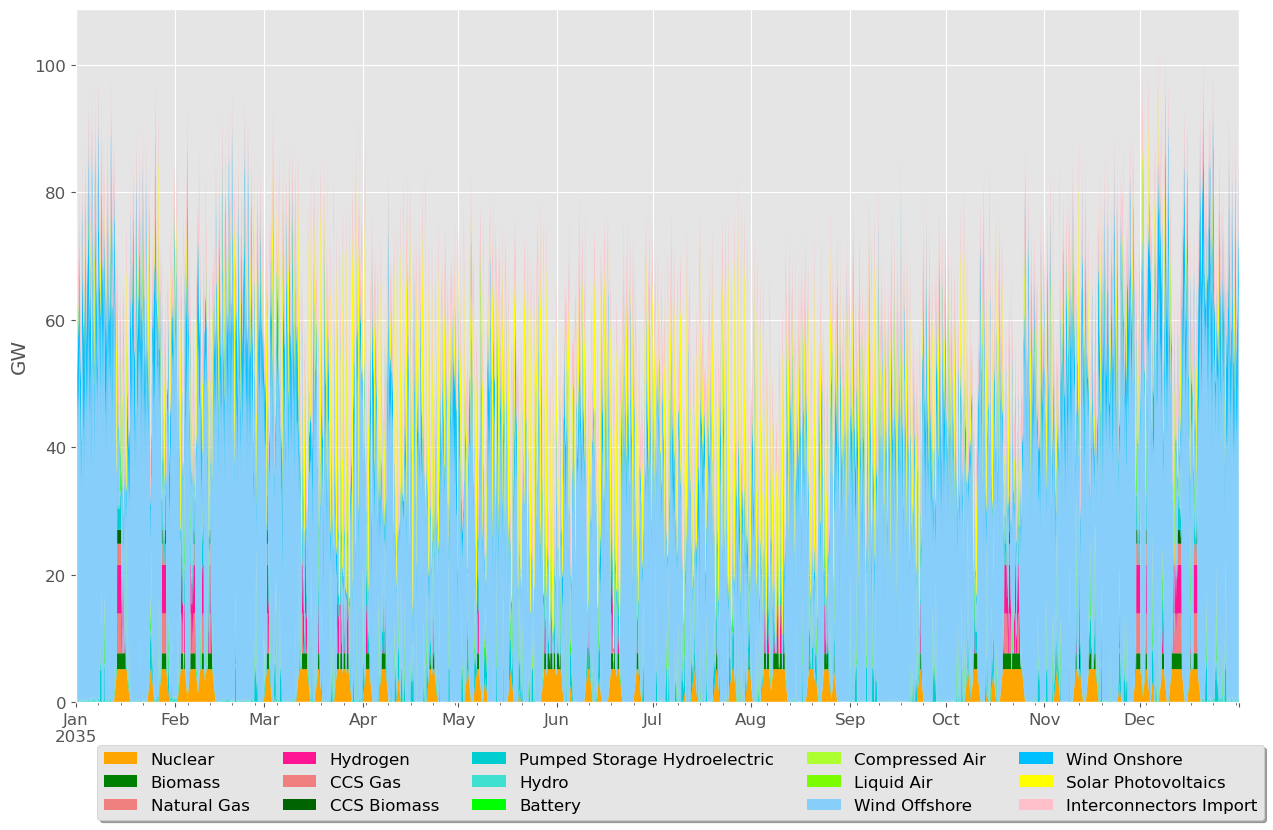

In [55]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming `network` is an already defined object with necessary attributes

# Group power generation by carrier type and sum across all time steps
p_by_carrier = network.generators_t.p.T.groupby(network.generators.carrier).sum().T

# Group storage power by carrier type and sum
storage_by_carrier = network.storage_units_t.p.T.groupby(network.storage_units.carrier).sum().T

# Set negative storage values (discharging) to zero
storage_by_carrier[storage_by_carrier < 0] = 0

# Combine generation and storage data
p_by_carrier = pd.concat([p_by_carrier, storage_by_carrier], axis=1)

# Calculate interconnector imports (positive values)
imp = network.links_t.p0.copy()
imp[imp < 0] = 0
imp['Interconnectors Import'] = imp.sum(axis=1)
interconnector_import = imp[['Interconnectors Import']]
p_by_carrier = pd.concat([p_by_carrier, interconnector_import], axis=1)

# Calculate interconnector exports (negative values)
exp = network.links_t.p0.copy()
exp[exp > 0] = 0
exp['Interconnectors Export'] = exp.sum(axis=1)
interconnector_export = exp[['Interconnectors Export']]

# Group biomass data together
p_by_carrier['Biomass'] = (
    p_by_carrier['Biomass (dedicated)'] + p_by_carrier['Biomass (co-firing)'])

# Rename hydro and interconnector columns
p_by_carrier = p_by_carrier.rename(columns={'Large Hydro': 'Hydro'})
p_by_carrier = p_by_carrier.rename(columns={'Interconnector': 'Interconnectors Import'})

# Save the data to CSV
p_by_carrier.to_csv('power_generation_by_carrier.csv', index=True)

# Define colors for each carrier
colors = {"Coal": "grey",
          "Diesel/Gas oil": "black",
          "Diesel/gas Diesel/Gas oil": "black",
          'Oil': 'black',
          'Unmet Load': 'black',
          'Anaerobic Digestion': 'green',
          'Waste': 'chocolate',
          'Sewage Sludge Digestion': 'green',
          'Landfill Gas': 'green',
          'Biomass (dedicated)': 'green',
          'Biomass (co-firing)': 'green',
          'Biomass': 'green',
          'CCS Biomass': 'darkgreen',
          'Interconnectors Import': 'pink',
          'B6 import': 'pink',
          "Sour gas": "lightcoral",
          "Natural Gas": "lightcoral",
          'CCS Gas': "lightcoral",
          'Hydrogen': "deeppink",
          "Nuclear": "orange",
          'Shoreline Wave': 'aqua',
          'Tidal Barrage and Tidal Stream': 'aqua',
          'Hydro': "turquoise",
          "Large Hydro": "turquoise",
          "Small Hydro": "turquoise",
          "Pumped Storage Hydroelectric": "darkturquoise",
          'Battery': 'lime',
          'Compressed Air': 'greenyellow',
          'Liquid Air': 'lawngreen',
          "Wind Offshore": "lightskyblue",
          'Wind Onshore': 'deepskyblue',
          'Solar Photovoltaics': 'yellow'}

# Filter columns for plotting
cols = ["Nuclear", 'Biomass',
        'Waste', "Oil", "Natural Gas",
        'Hydrogen', 'CCS Gas', 'CCS Biomass',
        "Pumped Storage Hydroelectric", 'Hydro',
        'Battery', 'Compressed Air', 'Liquid Air',
        "Wind Offshore", 'Wind Onshore', 'Solar Photovoltaics',
        'Interconnectors Import', 'Unmet Load'
        ]

p_by_carrier = p_by_carrier[cols]

# Drop columns with maximum values less than 50
p_by_carrier.drop(
    (p_by_carrier.max()[p_by_carrier.max() < 50.0]).index,
    axis=1, inplace=True)

# Create the area plot
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15, 10)
(p_by_carrier / 1e3).plot(
    kind="area", ax=ax, linewidth=0,
    color=[colors[col] for col in p_by_carrier.columns])

# Adjust the plot layout and add legend
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

ax.legend(loc='upper center', bbox_to_anchor=(0.52, -0.05),
          fancybox=True, shadow=True, ncol=5)

ax.set_ylabel("GW")
ax.set_xlabel("")
plt.show()


In [56]:
import pypsa
import pandas as pd


# Get the generator outputs for each snapshot
generators_p = network.generators_t.p

# Get the buses data to map each generator to its bus
generators = network.generators

# Create a DataFrame to store the generation at each bus
generation_at_buses = pd.DataFrame(index=generators_p.index)

# Sum the generation at each bus for each snapshot
for bus in network.buses.index:
    # Find all generators connected to the bus
    connected_generators = generators[generators['bus'] == bus].index
    # Sum the generation from these generators
    generation_at_buses[bus] = generators_p[connected_generators].sum(axis=1)

# Print the generation at each bus
print(generation_at_buses)

# Save the generation at each bus to a CSV file
generation_at_buses.to_csv('generation_at_buses.csv', index=True)


                           Beauly     Peterhead    Errochty  \
snapshot                                                      
2035-01-01 00:00:00      0.000000      0.000000    0.000000   
2035-01-01 00:30:00      0.000000      0.000000    0.000000   
2035-01-01 01:00:00      0.000000      0.000000  754.821531   
2035-01-01 01:30:00      0.000000      0.000000    0.000000   
2035-01-01 02:00:00      0.000000      0.000000    0.000000   
...                           ...           ...         ...   
2035-12-31 21:30:00  11068.052472  19954.536531  534.237921   
2035-12-31 22:00:00  10815.874614  19664.125723    0.000000   
2035-12-31 22:30:00  10883.995605  19609.380133    0.000000   
2035-12-31 23:00:00      0.000000  19791.217140  546.539607   
2035-12-31 23:30:00  11276.189083  10033.491796  549.886666   

                     Denny/Bonnybridge     Neilston   Strathaven      Torness  \
snapshot                                                                        
2035-01-01 00:00:0

In [57]:
#plotting storage

Text(0.5, 0, '')

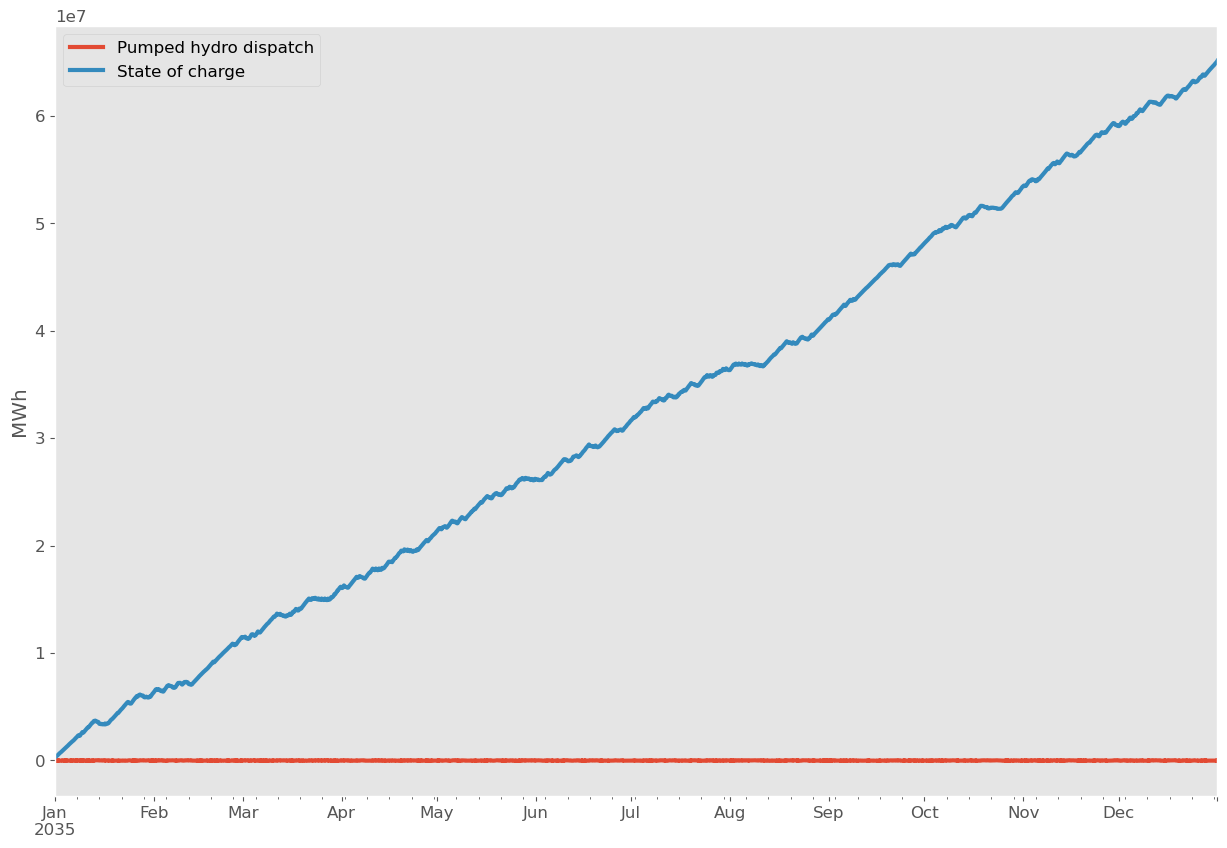

In [58]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)

p_storage = network.storage_units_t.p.sum(axis=1)
state_of_charge = network.storage_units_t.state_of_charge.sum(axis=1)
p_storage.plot(label="Pumped hydro dispatch", ax=ax, linewidth=3)
state_of_charge.plot(label="State of charge", ax=ax, linewidth=3)

ax.legend()
ax.grid()
ax.set_ylabel("MWh")
ax.set_xlabel("")

In [59]:
#plotting line loading

In [60]:
now = network.snapshots[47]

print("With the linear load flow, there is the following per unit loading:")
loading = network.lines_t.p0.loc[now] / network.lines.s_nom
loading.describe()

# Save the loading data to a CSV file
loading.to_csv('line_loading_snapshot_47.csv', header=True)

With the linear load flow, there is the following per unit loading:


In [61]:
# Check the length of the snapshots
num_snapshots = len(network.snapshots)
print(f"The network has {num_snapshots} snapshots.")

The network has 17520 snapshots.


In [62]:
# Choose a valid snapshot index
snapshot_index = 47  # Select the last available snapshot, for example
now = network.snapshots[snapshot_index]

print("With the linear load flow, there is the following per unit loading:")
loading = network.lines_t.p0.loc[now] / network.lines.s_nom
print(loading.describe())

# Save the loading data to a CSV file
loading.to_csv('line_loading_snapshot_47.csv', header=True)

With the linear load flow, there is the following per unit loading:
count    9.900000e+01
mean     1.216734e-10
std      1.877500e-09
min     -8.032297e-09
25%     -4.033504e-10
50%      2.125651e-10
75%      7.340723e-10
max      9.139914e-09
dtype: float64


C:\Users\rachm\anaconda3\Lib\site-packages\cartopy\mpl\feature_artist.py:144: UserWarning:

facecolor will have no effect as it has been defined as "never".



(<matplotlib.collections.PatchCollection at 0x239030ee390>,
 <matplotlib.collections.LineCollection at 0x23975d39750>)

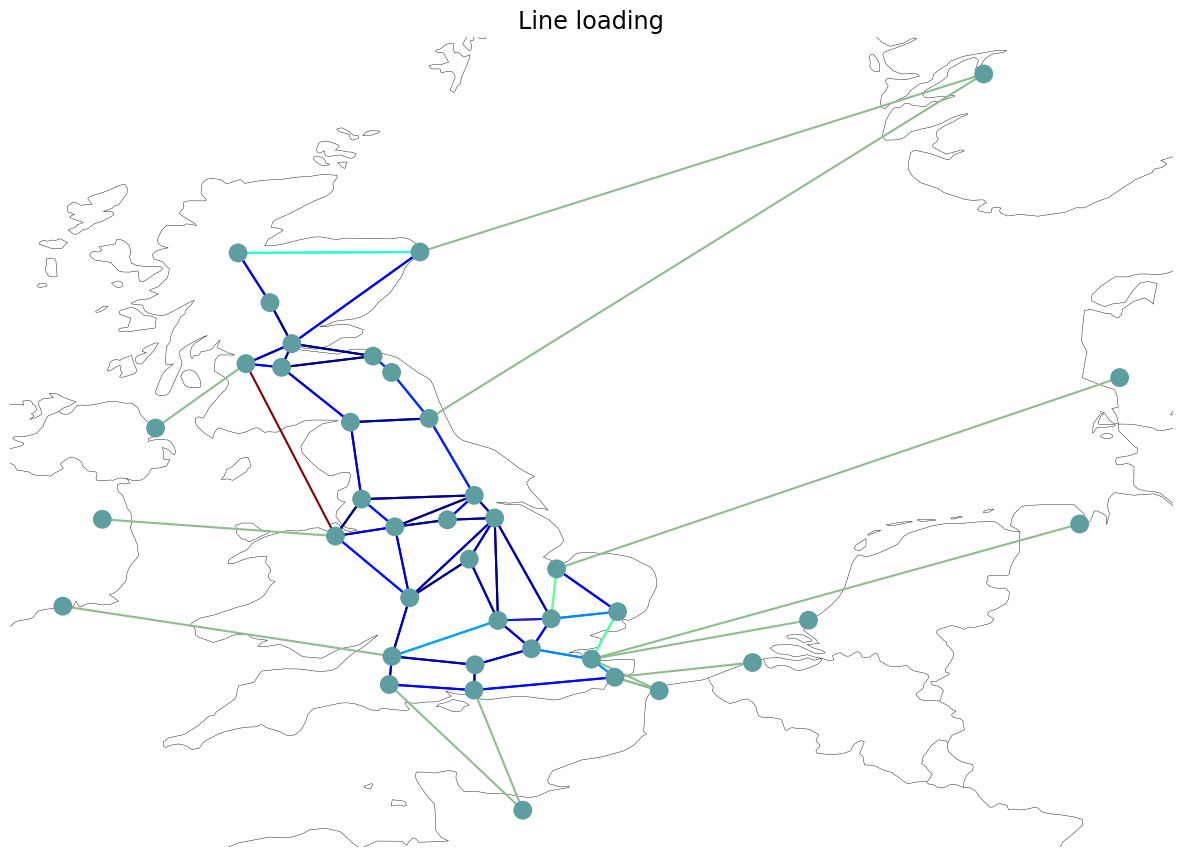

In [63]:
fig, ax = plt.subplots(1, 1, subplot_kw={"projection": ccrs.PlateCarree()})
fig.set_size_inches(15, 17)

network.plot(ax=ax, line_colors=abs(loading), line_cmap=plt.cm.jet, title="Line loading")

C:\Users\rachm\anaconda3\Lib\site-packages\cartopy\mpl\feature_artist.py:144: UserWarning:

facecolor will have no effect as it has been defined as "never".

C:\Users\rachm\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning:

Mean of empty slice.

C:\Users\rachm\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



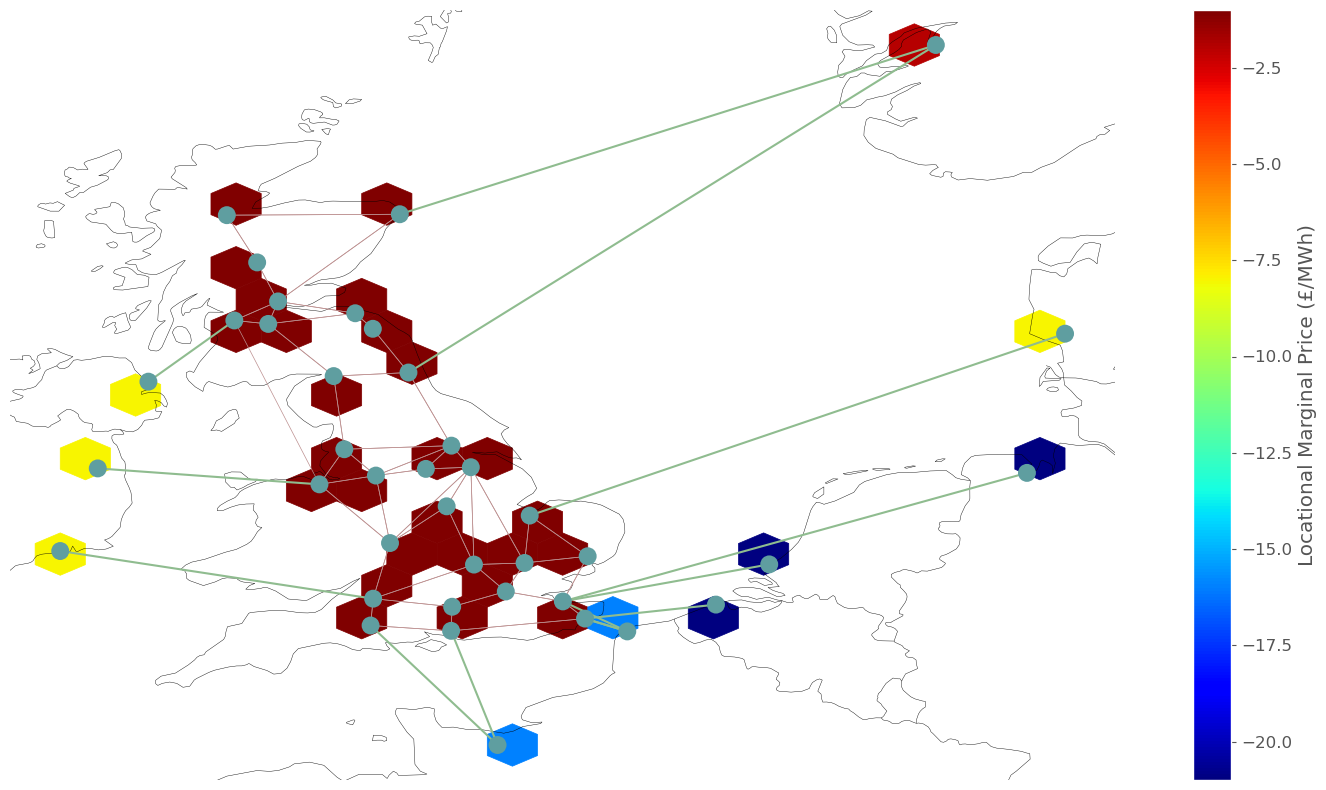

In [64]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig, ax = plt.subplots(1, 1, subplot_kw={"projection": ccrs.PlateCarree()})
fig.set_size_inches(20, 10)

network.plot(ax=ax, line_widths=pd.Series(0.5, network.lines.index))
plt.hexbin(network.buses.x, network.buses.y,
           gridsize=20,
           C=network.buses_t.marginal_price.loc[now],
           cmap=plt.cm.jet)

# for some reason the colorbar only works with graphs plt.plot
# and must be attached plt.colorbar

cb = plt.colorbar()
cb.set_label('Locational Marginal Price (£/MWh)')

In [65]:
network.buses_t.marginal_price

Bus                  Beauly  Peterhead  Errochty  Denny/Bonnybridge  Neilston  \
snapshot                                                                        
2035-01-01 00:00:00    -1.0       -1.0      -1.0               -1.0      -1.0   
2035-01-01 00:30:00    -1.0       -1.0      -1.0               -1.0      -1.0   
2035-01-01 01:00:00    -1.0       -1.0      -1.0               -1.0      -1.0   
2035-01-01 01:30:00    -1.0       -1.0      -1.0               -1.0      -1.0   
2035-01-01 02:00:00    -1.0       -1.0      -1.0               -1.0      -1.0   
...                     ...        ...       ...                ...       ...   
2035-12-31 21:30:00    -1.0       -1.0      -1.0               -1.0      -1.0   
2035-12-31 22:00:00    -1.0       -1.0      -1.0               -1.0      -1.0   
2035-12-31 22:30:00    -1.0       -1.0      -1.0               -1.0      -1.0   
2035-12-31 23:00:00    -1.0       -1.0      -1.0               -1.0      -1.0   
2035-12-31 23:30:00    -1.0       -1.0      -1.0               -1.0      -1.0   

Bus                  Strathaven  Torness  Eccles  Harker  Stella West  ...  \
snapshot                                                               ...   
2035-01-01 00:00:00        -1.0     -1.0    -1.0    -1.0         -1.0  ...   
2035-01-01 00:30:00        -1.0     -1.0    -1.0    -1.0         -1.0  ...   
2035-01-01 01:00:00        -1.0     -1.0    -1.0    -1.0         -1.0  ...   
2035-01-01 01:30:00        -1.0     -1.0    -1.0    -1.0         -1.0  ...   
2035-01-01 02:00:00        -1.0     -1.0    -1.0    -1.0         -1.0  ...   
...                         ...      ...     ...     ...          ...  ...   
2035-12-31 21:30:00        -1.0     -1.0    -1.0    -1.0         -1.0  ...   
2035-12-31 22:00:00        -1.0     -1.0    -1.0    -1.0         -1.0  ...   
2035-12-31 22:30:00        -1.0     -1.0    -1.0    -1.0         -1.0  ...   
2035-12-31 23:00:00        -1.0     -1.0    -1.0    -1.0         -1.0  ...   
2035-12-31 23:30:00        -1.0     -1.0    -1.0    -1.0         -1.0  ...   

Bus                  Netherlands  Belgium  France1  France2  Ireland  \
snapshot                                                               
2035-01-01 00:00:00        -21.0    -21.0    -16.0    -16.0     -8.0   
2035-01-01 00:30:00        -21.0    -21.0    -16.0    -16.0     -8.0   
2035-01-01 01:00:00        -21.0    -21.0    -16.0    -16.0     -8.0   
2035-01-01 01:30:00        -21.0    -21.0    -16.0    -16.0     -8.0   
2035-01-01 02:00:00        -21.0    -21.0    -16.0    -16.0     -8.0   
...                          ...      ...      ...      ...      ...   
2035-12-31 21:30:00        -21.0    -21.0    -16.0    -16.0     -8.0   
2035-12-31 22:00:00        -21.0    -21.0    -16.0    -16.0     -8.0   
2035-12-31 22:30:00        -21.0    -21.0    -16.0    -16.0     -8.0   
2035-12-31 23:00:00        -21.0    -21.0    -16.0    -16.0     -8.0   
2035-12-31 23:30:00        -21.0    -21.0    -16.0    -16.0     -8.0   

Bus                  N. Ireland  Denmark  Norway  Ireland2  Germany  
snapshot                                                             
2035-01-01 00:00:00        -8.0     -8.0    -2.0      -8.0    -21.0  
2035-01-01 00:30:00        -8.0     -8.0    -2.0      -8.0    -21.0  
2035-01-01 01:00:00        -8.0     -8.0    -2.0      -8.0    -21.0  
2035-01-01 01:30:00        -8.0     -8.0    -2.0      -8.0    -21.0  
2035-01-01 02:00:00        -8.0     -8.0    -2.0      -8.0    -21.0  
...                         ...      ...     ...       ...      ...  
2035-12-31 21:30:00        -8.0     -8.0    -2.0      -8.0    -21.0  
2035-12-31 22:00:00        -8.0     -8.0    -2.0      -8.0    -21.0  
2035-12-31 22:30:00        -8.0     -8.0    -2.0      -8.0    -21.0  
2035-12-31 23:00:00        -8.0     -8.0    -2.0      -8.0    -21.0  
2035-12-31 23:30:00        -8.0     -8.0    -2.0      -8.0    -21.0  

[17520 rows x 39 columns]

In [66]:
# Display the first few rows of the DataFrame
print(network.buses_t.marginal_price.head())

# Display the structure and data types of the DataFrame
print(network.buses_t.marginal_price.info())

# Display summary statistics
print(network.buses_t.marginal_price.describe())


Bus                  Beauly  Peterhead  Errochty  Denny/Bonnybridge  Neilston  \
snapshot                                                                        
2035-01-01 00:00:00    -1.0       -1.0      -1.0               -1.0      -1.0   
2035-01-01 00:30:00    -1.0       -1.0      -1.0               -1.0      -1.0   
2035-01-01 01:00:00    -1.0       -1.0      -1.0               -1.0      -1.0   
2035-01-01 01:30:00    -1.0       -1.0      -1.0               -1.0      -1.0   
2035-01-01 02:00:00    -1.0       -1.0      -1.0               -1.0      -1.0   

Bus                  Strathaven  Torness  Eccles  Harker  Stella West  ...  \
snapshot                                                               ...   
2035-01-01 00:00:00        -1.0     -1.0    -1.0    -1.0         -1.0  ...   
2035-01-01 00:30:00        -1.0     -1.0    -1.0    -1.0         -1.0  ...   
2035-01-01 01:00:00        -1.0     -1.0    -1.0    -1.0         -1.0  ...   
2035-01-01 01:30:00        -1.0     -1.0  

In [67]:
#saving the data into csv

# Define the filename for the CSV file
csv_filename = 'marginal_prices_2035_unified.csv'

# Save the marginal prices to a CSV file
network.buses_t.marginal_price.to_csv(csv_filename)

print(f"Marginal prices have been saved to {csv_filename}")


Marginal prices have been saved to marginal_prices_2035_unified.csv
